In [15]:
import os
import glob
import pandas as pd
import numpy as np
os.chdir("/cargo/public/catdata/gps-ps1-cat-coord/n64hp_all/")
#os.chdir("/store/public/databases/pugpq/calcounts/")

import healpy as hp
import matplotlib.pyplot as plt
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table

# 1. combine all sources into one dataframe

学长已经合并完了，在 /cargo/public/catdata/gps-ps1-cat-coord/n256hp_all_combined.h5

In [2]:
# extension = 'csv'
# all_filenames = [i for i in 
#                  glob.glob('/cargo/public/catdata/gps-ps1-cat-coord/n256hp_all/*.{}'.format(extension))]

In [3]:
# #combine all files in the list
# i = 0
# df_list = []
# for f in all_filenames:
#     i += 1
#     df_list.append(pd.read_csv(f))
#     print(i)
    
# combined_csv = pd.concat(df_list)
# combined_csv.reset_index(inplace=True,drop=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
combined_csv.shape

(832086842, 1)

In [6]:
combined_csv

n64pix
0           23955
1           23955
2           23699
3           23955
4           23699
...           ...
832086837   24501
832086838   24501
832086839   24501
832086840   24501
832086841   24757

[832086842 rows x 1 columns]

In [ ]:
# combined_csv.to_csv('/cargo/public/catdata/gpq_nir/GPPcoords.csv', index=False)

# 2. plot sky density of All gps-ps1-cat sources

In [36]:
combined_csv = pd.read_hdf('/cargo/public/catdata/gps-ps1-cat-coord/n256hp_all_combined.h5')

In [37]:
combined_csv

ra        dec          l         b  n64pix  n256pix
0          279.576696 -12.690404  20.148251 -2.891941   25742   412217
1          279.487453 -12.690570  20.108288 -2.814566   25742   412217
2          279.436939 -12.690852  20.085490 -2.770861   25742   412217
3          279.508762 -12.690698  20.117683 -2.833117   25742   412217
4          279.449989 -12.690877  20.091294 -2.782197   25742   412217
...               ...        ...        ...       ...     ...      ...
832086837  297.045802  18.530869  55.858757 -3.548145   26023   416415
832086838  297.045657  18.545286  55.871175 -3.540780   26023   416415
832086839  297.045965  18.566868  55.890016 -3.530183   26023   416415
832086840  297.045528  18.561742  55.885368 -3.532402   26023   416415
832086841  297.045889  18.563920  55.887426 -3.531604   26023   416415

[832086842 rows x 6 columns]

In [38]:
hptb = combined_csv.groupby('n256pix').size()

In [39]:
hptb

n256pix
320000      971
321024    10282
322047     2966
322048    18702
322049     7066
          ...  
562109       14
562110      560
562111      180
563133       83
563134       39
Length: 44549, dtype: int64

The area per pix is 0.052 deg^2 and the highest density per pix is 2678671.539


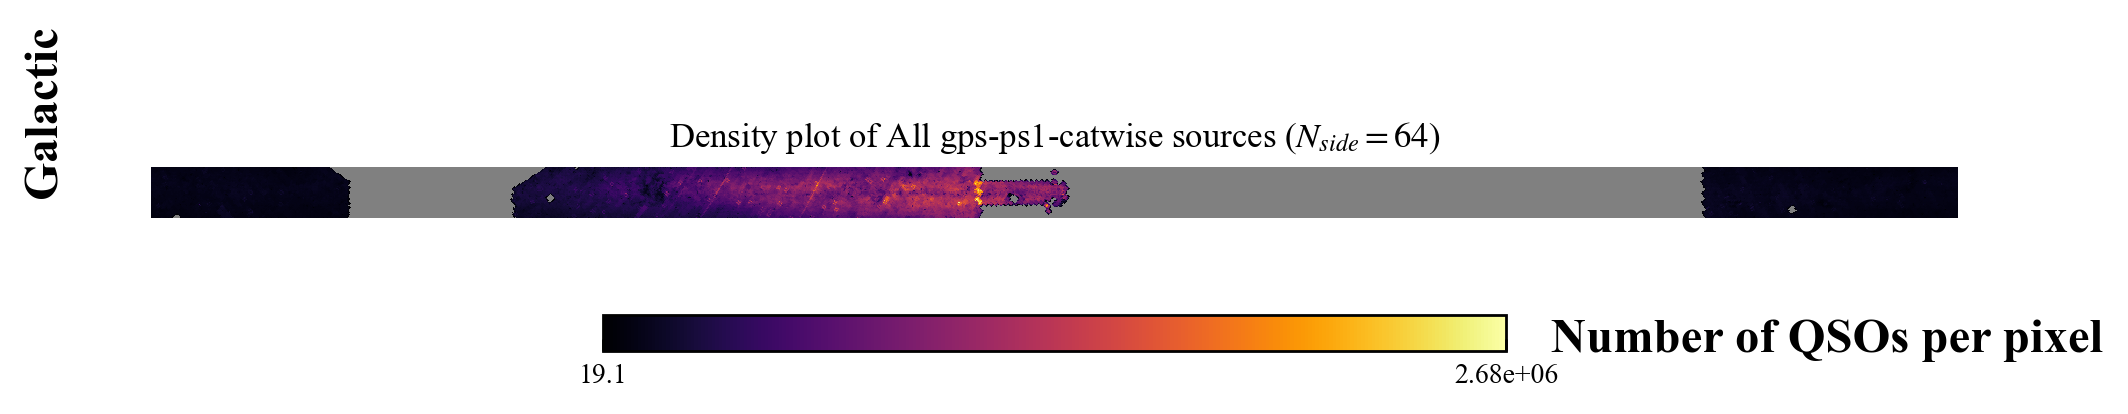

In [59]:
nside = 256
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))


hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN
# hpxmap_sm = hp.smoothing(hpxmap,fwhm=np.radians(1))

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    # latra=[-20,20],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
#             badcolor='w',
#             bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of All gps-ps1-catwise sources ($N_{side}=64$)")


map_dump = pd.DataFrame(cartb)

In [41]:
sig_min = hptb.min() / (ssky / npix)
sig_median = np.median(hptb) / (ssky / npix)
sig_max = hptb.max() / (ssky / npix)

print('min density:',sig_min)
print('median density:',sig_median)
print('max density:',sig_max)

min density: 19.06364964311673
median density: 141261.64385549497
max density: 2678671.5386536177


In [42]:
cmall_b5 = map_dump.values
cmall_b5.shape

(50, 1800)

In [60]:
np.save('/cargo/public/catdata/gpq_nir/cmall_b5.npy',cmall_b5)

In [44]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 100 # 提高图片分辨率

<ipython-input-61-dba1d316f07c>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hpxmap = np.zeros(npix, dtype=np.float)
0.0 180.0 -180.0 180.0


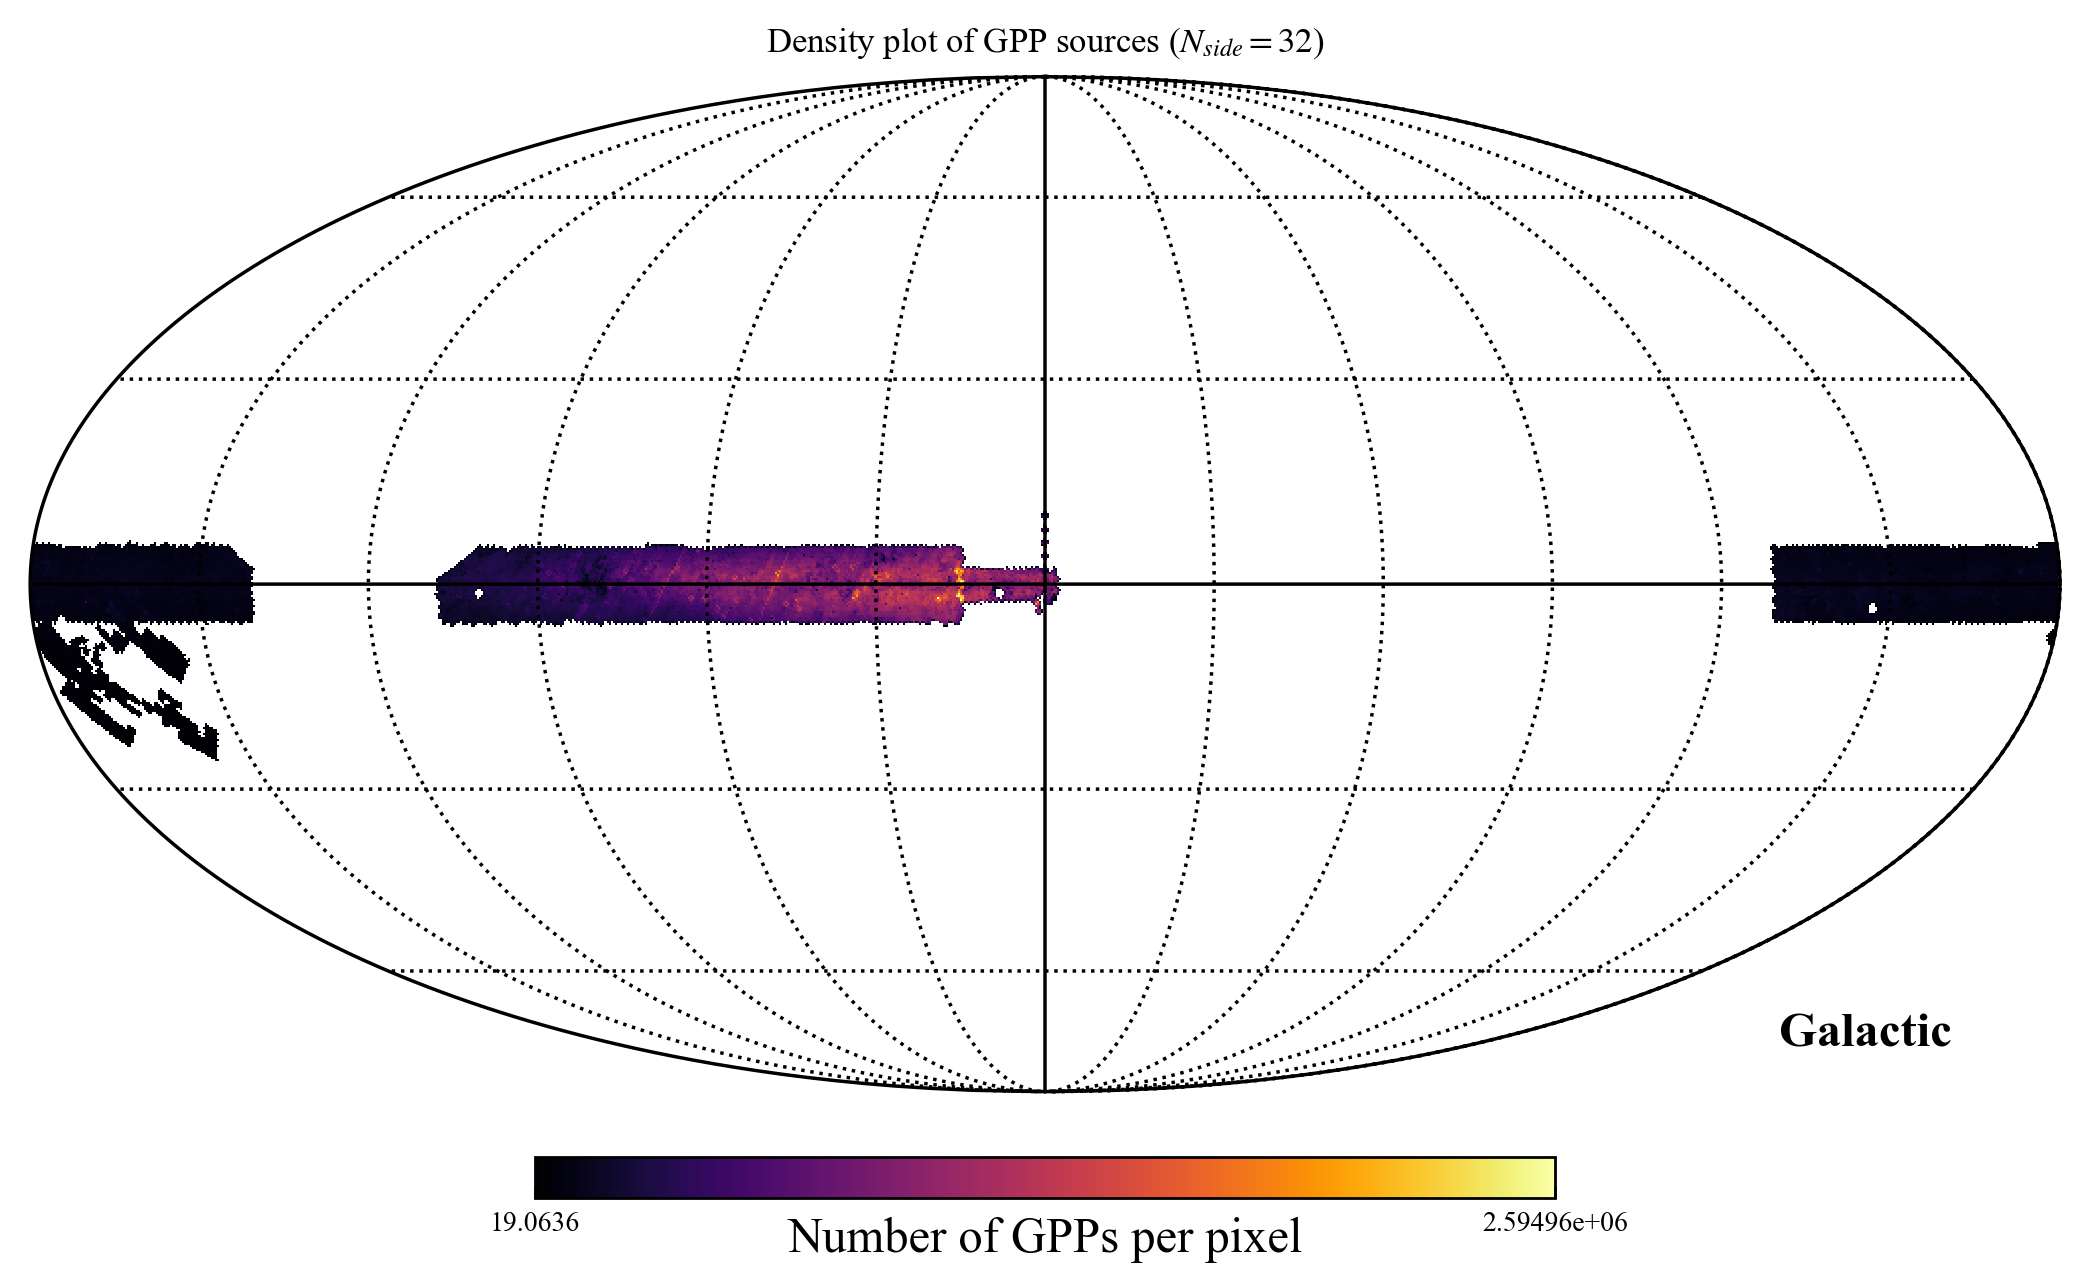

In [61]:
hpxmap = np.zeros(npix, dtype=np.float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN

# hpxmap[hpxmap == 0] = 'nan'

hp.mollview(hpxmap,
            coord=["G"],
            cmap='inferno',
            badcolor='w',
            bgcolor='w',
            unit="Number of GPPs per pixel",
            xsize=1000,
            title="Density plot of GPP sources ($N_{side}=32$)")
hp.graticule()
f = plt.gcf()
f.savefig('/cargo/public/catdata/gpq_nir/densGPP.pdf')

In [62]:
iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('/cargo/public/catdata/gpq_nir/GPP_healpixmap.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


In [47]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

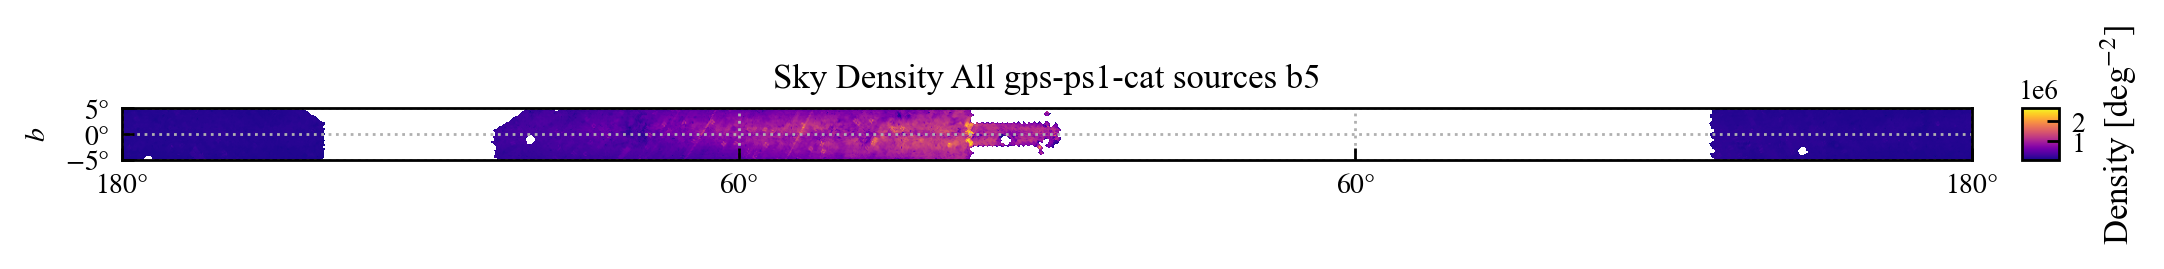

In [48]:
# sky density

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(cmall_b5.data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 600))
ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
                      r'$60\degree$',r'$180\degree$'))

ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky Density All gps-ps1-cat sources b5')

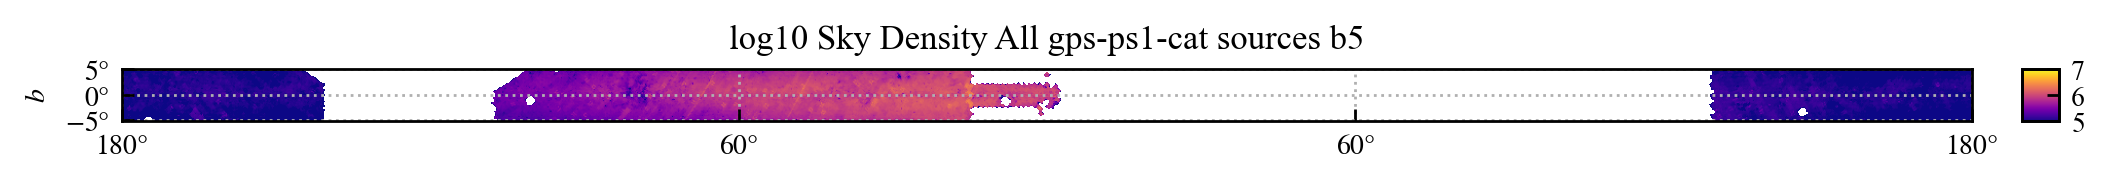

In [49]:
# log10 sky density

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)

im = ax1.imshow(np.log10(cmall_b5).data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 600))
ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
                      r'$60\degree$',r'$180\degree$'))

ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('log10 Sky Density All gps-ps1-cat sources b5')

im.set_clim(5, 7)
plt.colorbar(im, cax=cax)
plt.show()

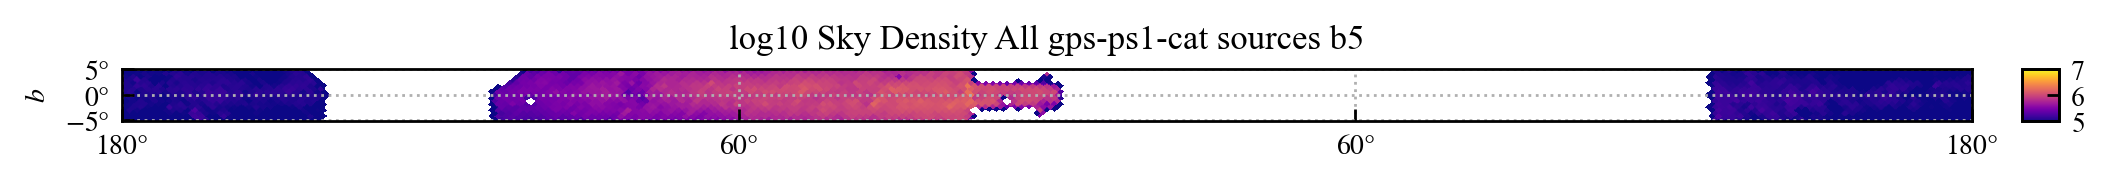

In [88]:
# 64pix的log10 sky density

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm
# fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='2%', pad=0.2)

# im = ax1.imshow(np.log10(cmall_b5).data,
#                 origin='lower',
#                 cmap='plasma',
# #                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
#                )
# ax1.set_xticks(np.arange(0, 1801, 600))
# ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
#                       r'$60\degree$',r'$180\degree$'))

# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im, cax=cax, 
#                      orientation='vertical',
#                      label='Density [$\mathrm{deg}^{-2}$]')
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('log10 Sky Density All gps-ps1-cat sources b5')

# im.set_clim(5, 7)
# plt.colorbar(im, cax=cax)
# plt.show()

# 3. plot goodmockgpq sky density

In [19]:
mockgpq = pd.read_csv('/cargo/public/catdata/gpq_nir/output/GoodMockGPQNIR_encap_10.csv')
mockgpq = mockgpq[mockgpq.dec>-30]
c = SkyCoord(mockgpq.l.values * u.deg, mockgpq.b.values * u.deg, frame='galactic')
newl = c.l.wrap_at(180 * u.deg)

The area per pix is 0.052 deg^2 and the highest density per pix is 324.082


80.00000000000003 99.99999999999997 -9.999999999999975 9.999999999999975
setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


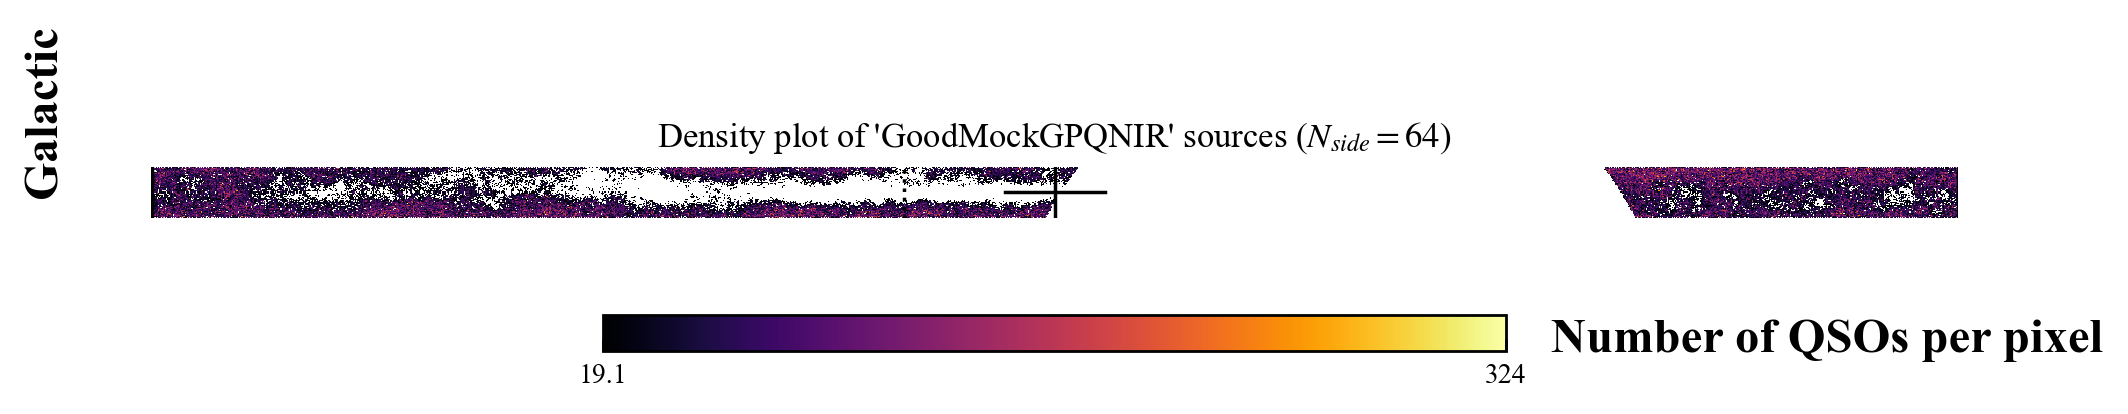

In [63]:
# nside	= 2**res	: The number of pixels per side.
# npix	= 12*nside**2	: The total number of pixels in the map.

nside = 256
coord = SkyCoord(l=mockgpq['l'].values * u.degree,
                 b=mockgpq['b'].values * u.degree, frame='galactic')
ahp = HEALPix(nside=nside, order='ring', frame=Galactic())
mockgpq['pix'] = ahp.skycoord_to_healpix(coord)
hptb = mockgpq.groupby('pix').size()
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of 'GoodMockGPQNIR' sources ($N_{side}=64$)")



map_dump = pd.DataFrame(cartb)

hp.graticule()
f = plt.gcf()
# f.savefig('densMockGPQ.pdf')




iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('/cargo/public/catdata/gpq_nir/MockGPQ_healpixmap.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

In [64]:
cmgpq_b5_b = map_dump.values

In [22]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

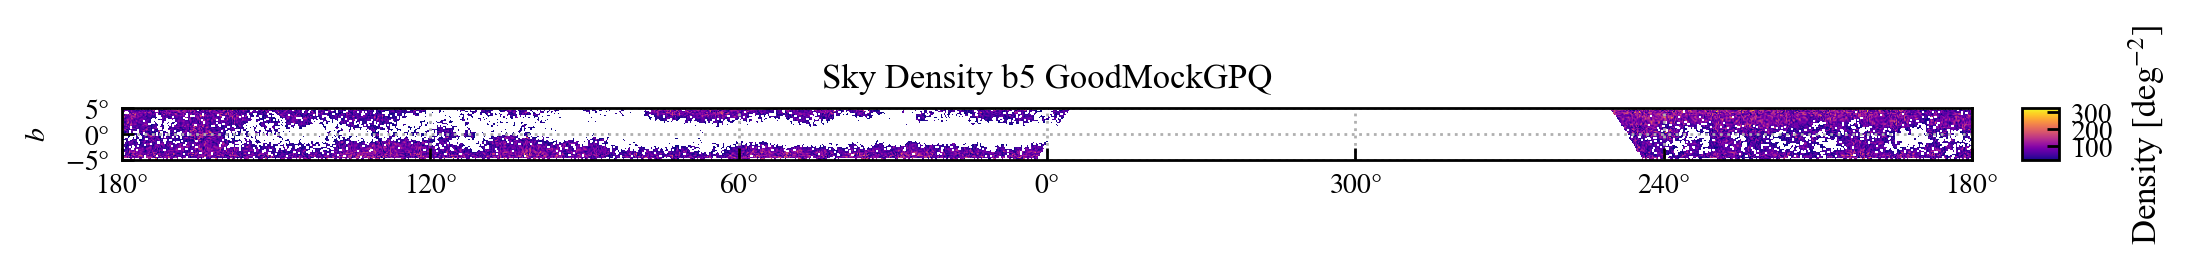

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(cmgpq_b5_b.data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky Density b5 GoodMockGPQ')

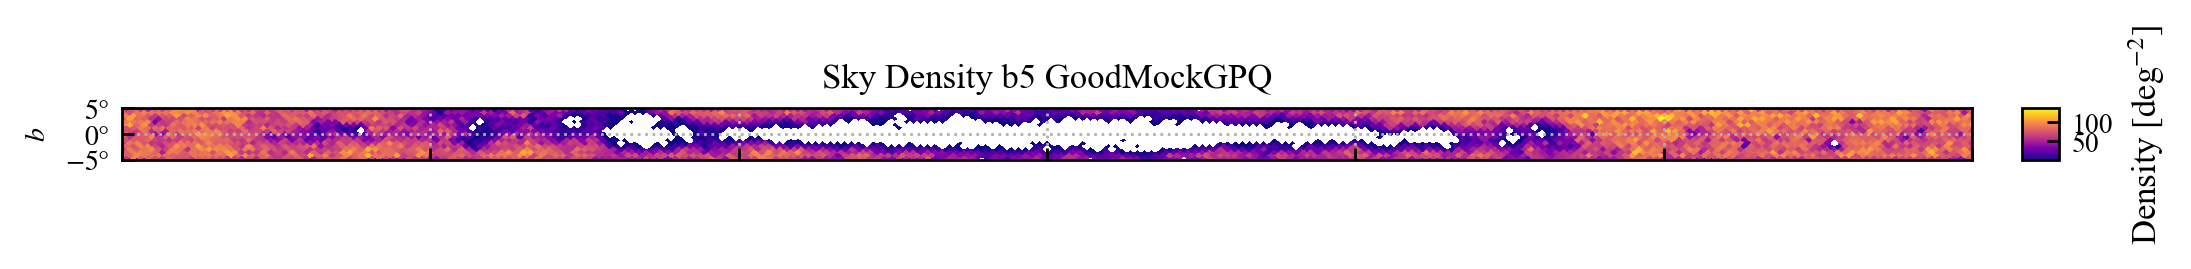

In [33]:
# 64 pixel

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm
# fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='2%', pad=0.2)
# im = ax1.imshow(cmgpq_b5_b.data,
#                 origin='lower',
#                 cmap='plasma',
# #                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
#                )
# ax1.set_xticks(np.arange(0, 1801, 300))
# ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                       r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                       r'$180\degree$'))
# ax1.set_xticklabels([])
# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im, cax=cax, 
#                      orientation='vertical',
#                      label='Density [$\mathrm{deg}^{-2}$]')
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('Sky Density b5 GoodMockGPQ')

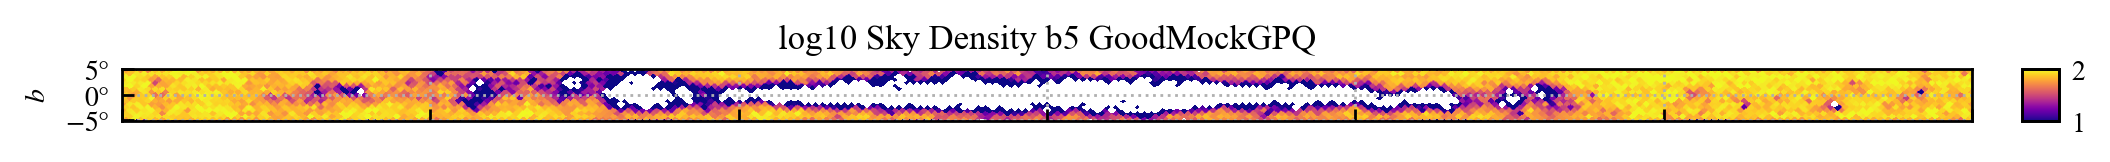

In [34]:
# log10 64 pixel

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm
# fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='2%', pad=0.2)
# im = ax1.imshow(np.log10(cmgpq_b5_b).data,
#                 origin='lower',
#                 cmap='plasma',
# #                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
#                )
# ax1.set_xticks(np.arange(0, 1801, 300))
# ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                       r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                       r'$180\degree$'))
# ax1.set_xticklabels([])
# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im, cax=cax, 
#                      orientation='vertical',
#                      label='Density [$\mathrm{deg}^{-2}$]')
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('log10 Sky Density b5 GoodMockGPQ')

# im.set_clim(1,2)
# plt.colorbar(im, cax=cax)
# plt.show()

In [24]:
np.save('/cargo/public/catdata/gpq_nir/cmgpq_b5_b.npy',cmgpq_b5_b)

# 4. plot sky density of GoodQSO (high-b)

In [25]:
goodqso = pd.read_csv('/cargo/public/catdata/gpq_nir/goodqso.csv')

The area per pix is 0.052 deg^2 and the highest density per pix is 247.827


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


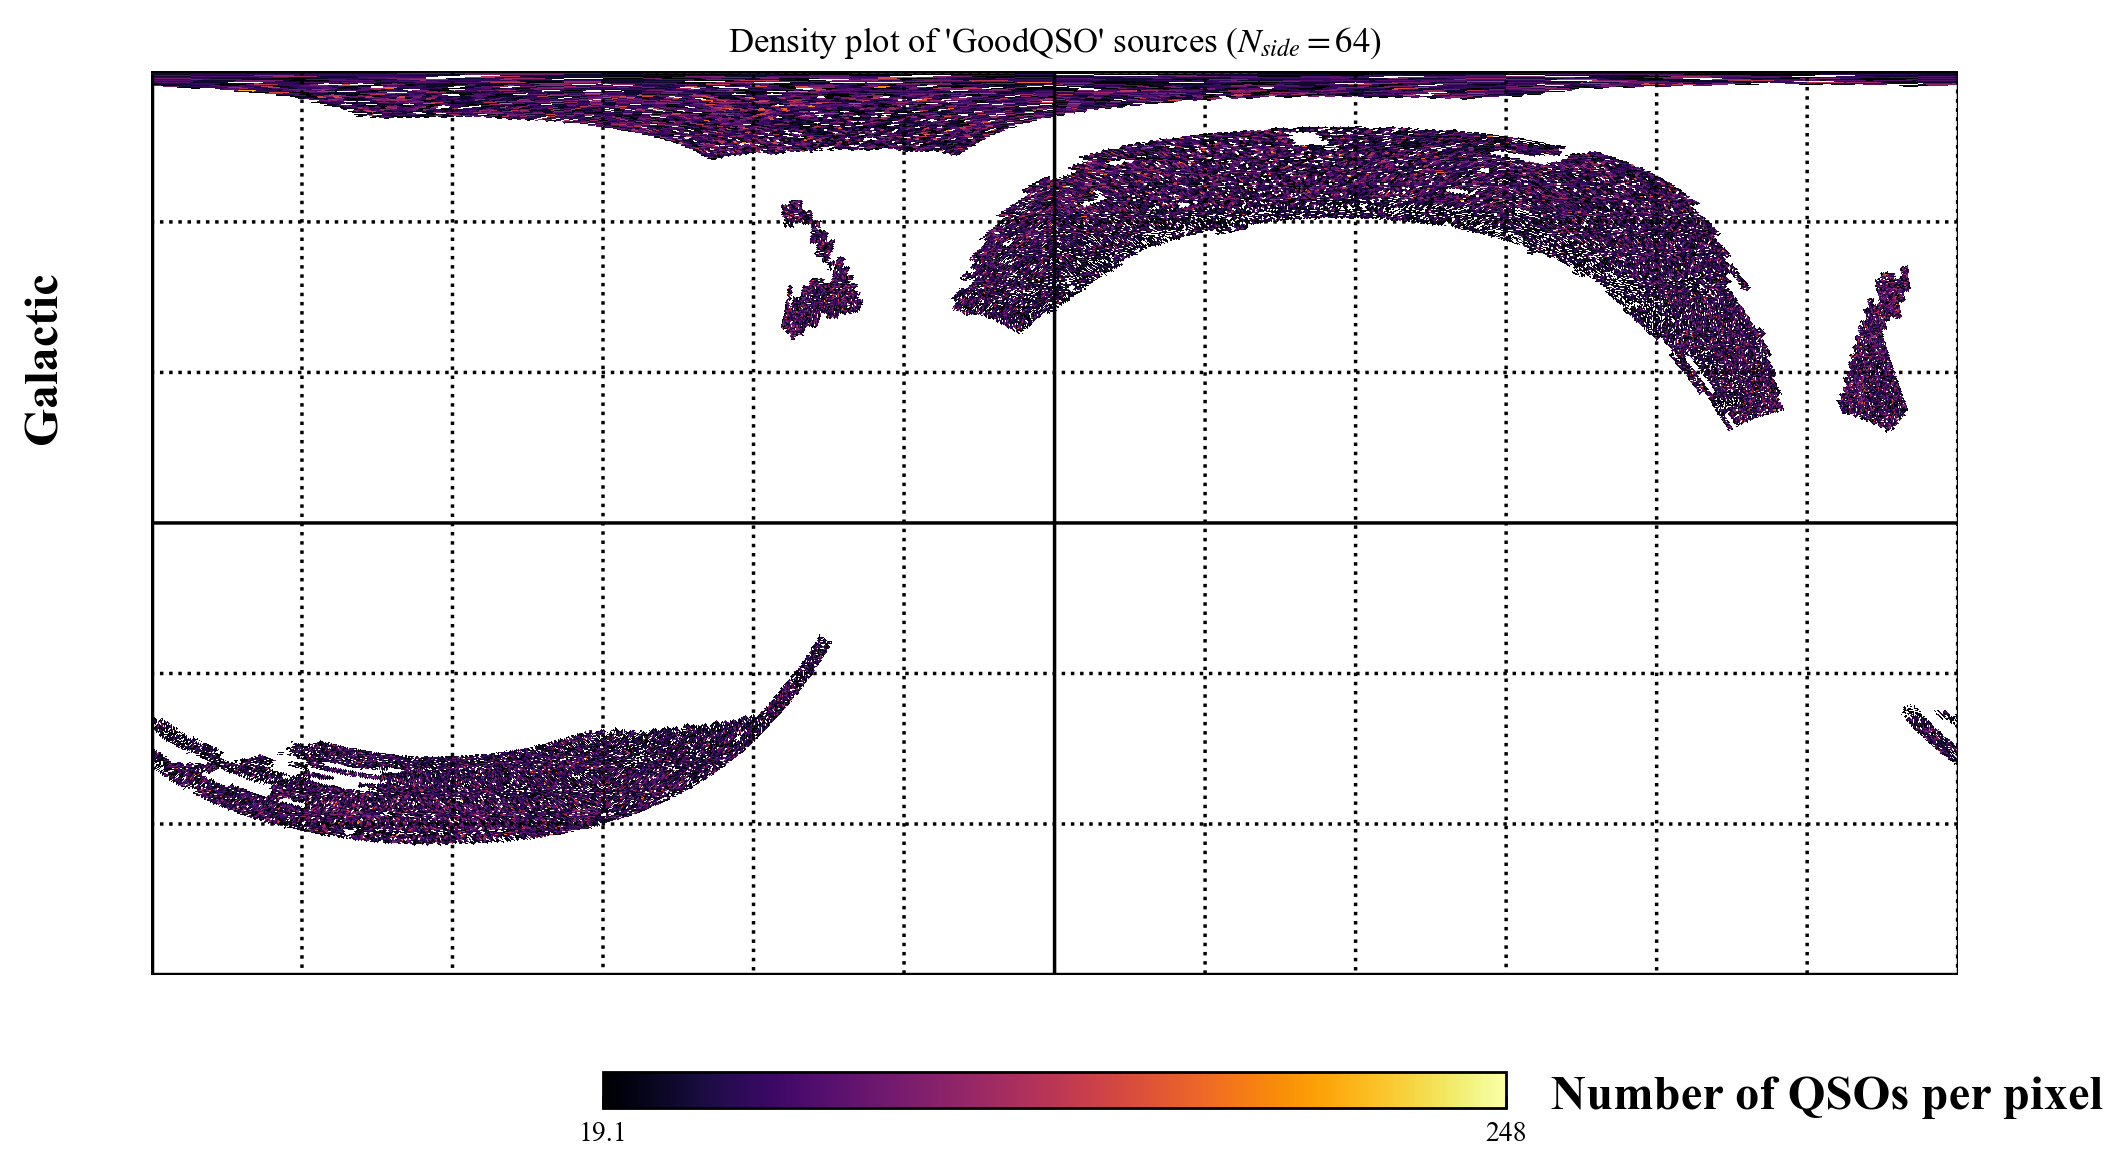

In [65]:
# nside	= 2**res	: The number of pixels per side.
# npix	= 12*nside**2	: The total number of pixels in the map.

nside = 256
coord = SkyCoord(l=goodqso['l'].values * u.degree,
                 b=goodqso['b'].values * u.degree, frame='galactic')
ahp = HEALPix(nside=nside, order='ring', frame=Galactic())
goodqso['pix'] = ahp.skycoord_to_healpix(coord)
hptb = goodqso.groupby('pix').size()
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN



cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-90,90],  # 限制正负五度天区
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of 'GoodQSO' sources ($N_{side}=64$)")



map_dump = pd.DataFrame(cartb)

hp.graticule()
f = plt.gcf()
f.savefig('/cargo/public/catdata/gpq_nir/densGoodQSO.pdf')



iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('/cargo/public/catdata/gpq_nir/GoodQSO_healpixmap.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

The area per pix is 0.839 deg^2 and the highest density per pix is 97.701


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


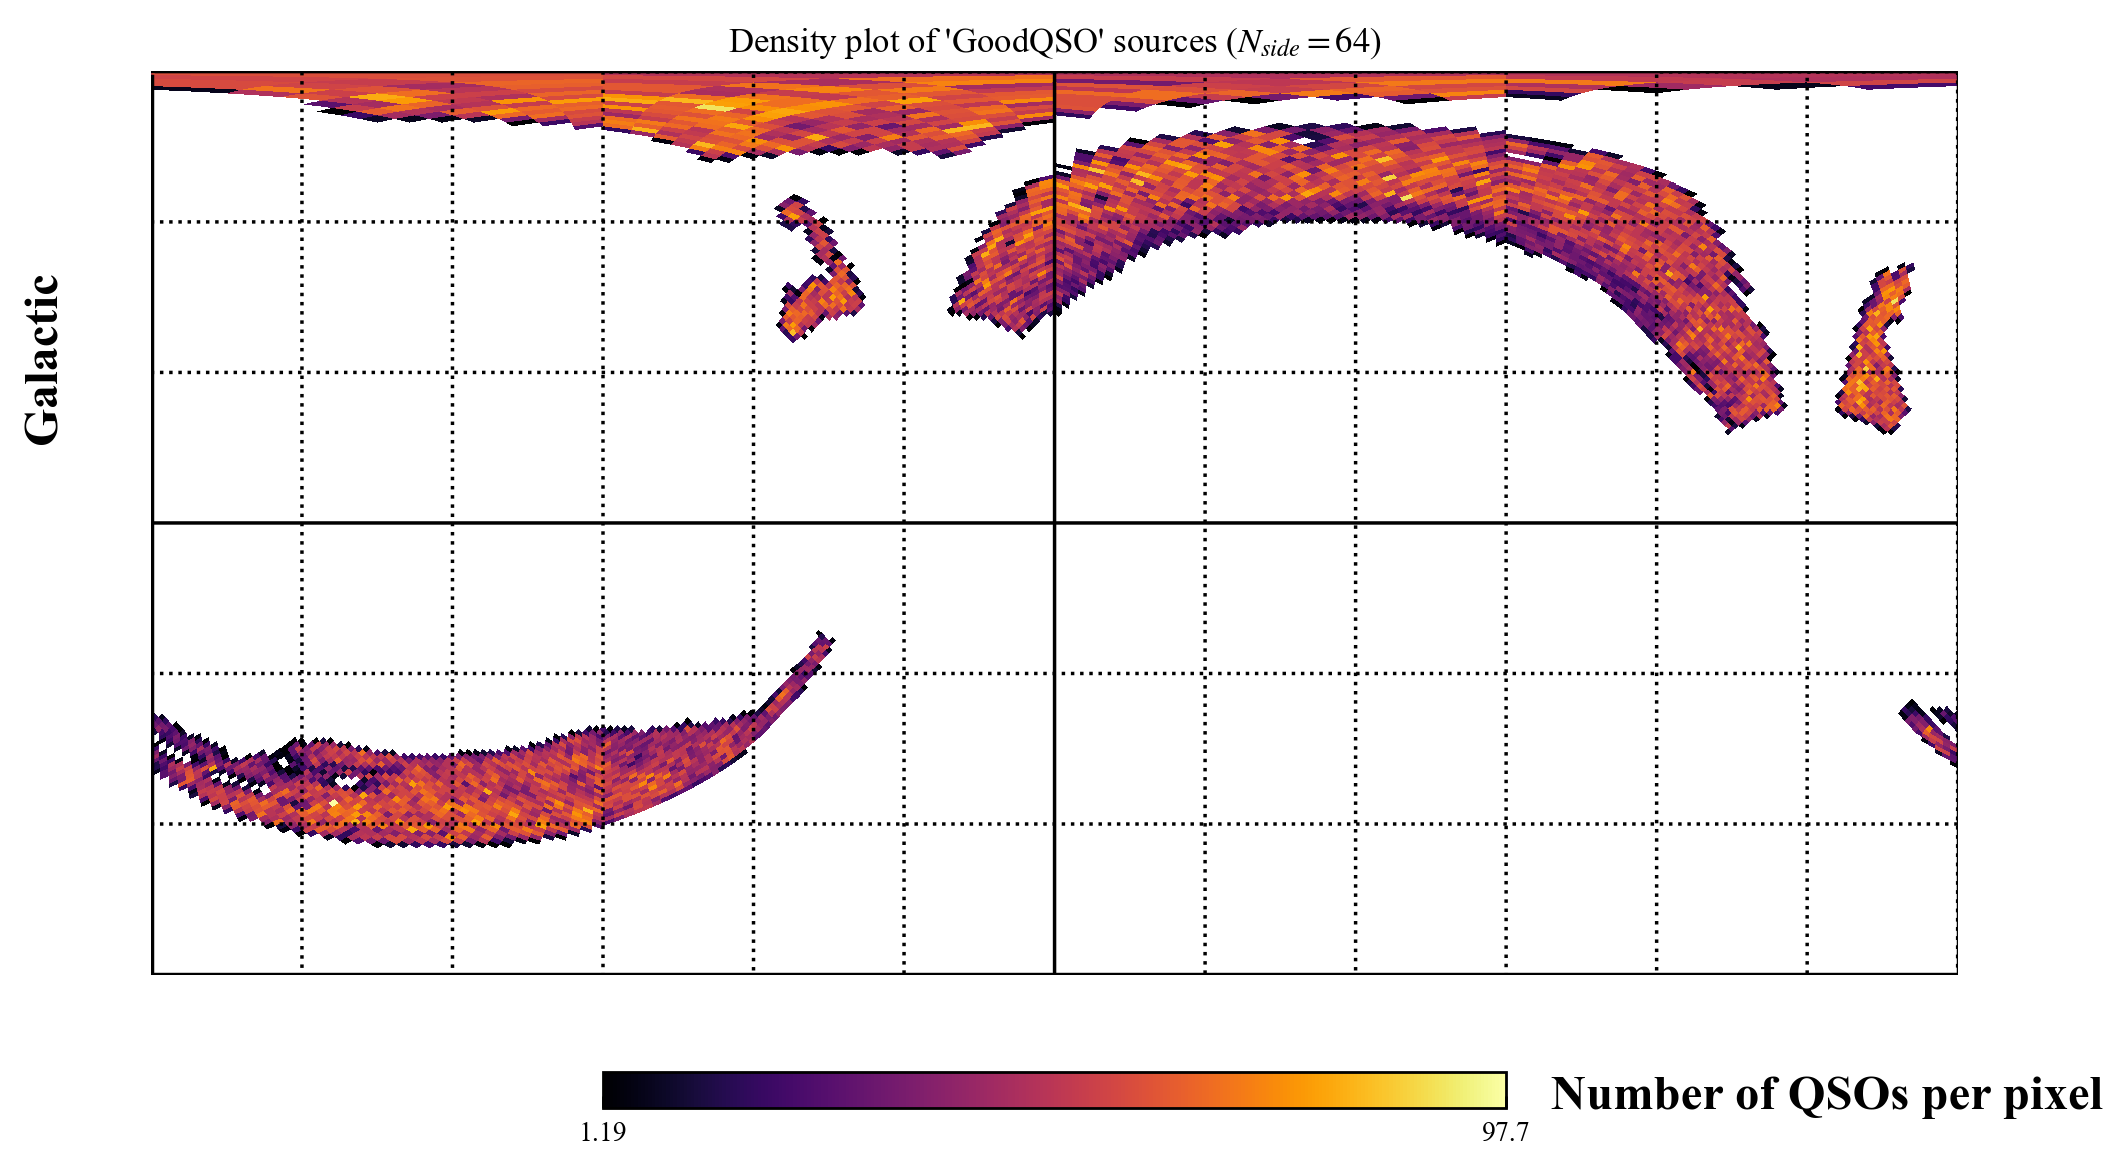

In [28]:
# 64 pixel

# nside = 64
# coord = SkyCoord(l=goodqso['l'].values * u.degree,
#                  b=goodqso['b'].values * u.degree, frame='galactic')
# ahp = HEALPix(nside=nside, order='ring', frame=Galactic())
# goodqso['pix'] = ahp.skycoord_to_healpix(coord)
# hptb = goodqso.groupby('pix').size()
# npix = hp.nside2npix(nside)

# pi = np.pi
# ssky = 4 * pi * ((180 / pi)**2)
# spix = ssky / npix
# sig_max = hptb.max() / (ssky / npix)
# print('The area per pix is {0:.3f} deg^2 and the highest density per\
#  pix is {1:.3f}'.format(spix, sig_max))

# hpxmap = np.zeros(npix, dtype=float)
# for i in hptb.index.values:
#     hpxmap[i] = hptb[i]  # 只填充有值的位置
# hpxmap = hpxmap/spix
# # hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN



# cartb = hp.cartview(hpxmap,
#                     coord=["G"],
#                     latra = [-90,90],  # 限制正负五度天区
#                     cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
#                     unit="Number of QSOs per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of 'GoodQSO' sources ($N_{side}=64$)")



# map_dump = pd.DataFrame(cartb)

# hp.graticule()
# f = plt.gcf()
# f.savefig('/cargo/public/catdata/gpq_nir/densGoodQSO.pdf')



# iring = np.arange(npix)
# inest = hp.ring2nest(nside, iring)
# hp.write_map('/cargo/public/catdata/gpq_nir/GoodQSO_healpixmap.fits',
#              m=[iring, inest, hpxmap],
#              coord='G',
#              column_names=['iring', 'inest', 'map'],
#              fits_IDL=False,
#              overwrite=True)

In [27]:
sig_min = hptb.min() / (ssky / npix)
sig_median = np.median(hptb) / (ssky / npix)
sig_max = hptb.max() / (ssky / npix)

print('min density:',sig_min)
print('median density:',sig_median)
print('max density:',sig_max)

min density: 19.06364964311673
median density: 57.190948929350185
max density: 247.82744536051746


In [32]:
cmgoodqso = map_dump.values
cmgoodqso.shape

(900, 1800)

In [33]:
np.save('/cargo/public/catdata/gpq_nir/cmgoodqso.npy',cmgoodqso)

In [34]:
np.nanmedian(cmgoodqso)

57.190948929350185

# 5. prior probability and sky density plot of b5 GPQ

### 用cm计算的density是不精确的，并不对应每个pixel，而是对应cartview分出的坐标格（比如(50，1800)）
### 应该用hpxmap来保存每个pixel对应的数量保存为healpixmap.fits再用来计算先验概率，然后用cm来画图

#### D_all: 
/cargo/public/catdata/gpq_nir/GPP_healpixmap.fits  
cmall_b5   

#### D_goodph: 
/cargo/public/catdata/gpq_nir/GPP_healpixmap-goodph.fits  
cmallgood_b5  

#### D_old:   
/cargo/public/catdata/gpq_nir/MockGPQ_healpixmap.fits
cmgpq_b5_b  

#### D_new' = 
D_old * D_goodph/D_all    

D_new >= D_new' * Median(D_goodqso)/Median(D_new')  

#### D_new_low:
D_new' * Median(D_goodqso)/Median(D_new')  

### 5.1 calculate prior probability

In [96]:
all_tb = Table.read("/cargo/public/catdata/gpq_nir/GPP_healpixmap.fits",character_as_bytes=False)
all_hpxmap = all_tb.to_pandas()

goodph_tb = Table.read("/cargo/public/catdata/gpq_nir/GPP_healpixmap-goodph.fits",character_as_bytes=False)
goodph_hpxmap = goodph_tb.to_pandas()

goodmockgpq_tb = Table.read("/cargo/public/catdata/gpq_nir/MockGPQ_healpixmap.fits",character_as_bytes=False)
goodmockgpq_hpxmap = goodmockgpq_tb.to_pandas()

goodqso_tb = Table.read("/cargo/public/catdata/gpq_nir/GoodQSO_healpixmap.fits",character_as_bytes=False)
goodqso_hpxmap = goodqso_tb.to_pandas()

# map一栏表示每个pixel的density，不是每个pixel的数量，因为除过spix

## combined_hpxmap是全天的pixel，需要选出正负五度的pixel来统计天去密度分布的中间值
如果缺失值取nan，则高银纬的D_old都是nan，prior也是nan。但是我们如果把正负五度的缺失值都当作密度为0，那么我们求正负五度密度median时需要将正负五度的nan转换为0再用describe(或者nanmedian这种)。所以我们拆分出正负五度的combined_hpxmap单独分析，再整合到全天的combined_hpxmap里  
  
另外还需要注意，如果前面用的unseen处理，这里计算prior会出问题，因为unseen是一个绝对值很大的负数，而两个unseen相乘会使得这个pixel的概率异常大

In [97]:
combined_hpxmap = all_hpxmap.rename(columns={'map':'D_all'})
combined_hpxmap['D_goodph'] = goodph_hpxmap['map']
combined_hpxmap['D_old'] = goodmockgpq_hpxmap['map']
combined_hpxmap['D_goodqso'] = goodqso_hpxmap['map']
combined_hpxmap

iring   inest  D_all  D_goodph  D_old  D_goodqso
0            0   65535    NaN       NaN    NaN  38.127299
1            1  131071    NaN       NaN    NaN  38.127299
2            2  196607    NaN       NaN    NaN  19.063650
3            3  262143    NaN       NaN    NaN  38.127299
4            4   65534    NaN       NaN    NaN  95.318248
...        ...     ...    ...       ...    ...        ...
786427  786427  720897    NaN       NaN    NaN        NaN
786428  786428  524288    NaN       NaN    NaN        NaN
786429  786429  589824    NaN       NaN    NaN        NaN
786430  786430  655360    NaN       NaN    NaN        NaN
786431  786431  720896    NaN       NaN    NaN        NaN

[786432 rows x 6 columns]

In [98]:
combined_hpxmap['D_new_'] = combined_hpxmap['D_old']*combined_hpxmap['D_goodph']/combined_hpxmap['D_all']

In [99]:
combined_hpxmap['D_new_low'] = combined_hpxmap['D_new_']*np.nanmedian(combined_hpxmap['D_goodqso'])/np.nanmedian(combined_hpxmap['D_new_'])

In [100]:
combined_hpxmap['prior_gpq'] = combined_hpxmap['D_new_low']/combined_hpxmap['D_goodph']

In [101]:
combined_hpxmap

iring   inest  D_all  D_goodph  D_old  D_goodqso  D_new_  D_new_low  \
0            0   65535    NaN       NaN    NaN  38.127299     NaN        NaN   
1            1  131071    NaN       NaN    NaN  38.127299     NaN        NaN   
2            2  196607    NaN       NaN    NaN  19.063650     NaN        NaN   
3            3  262143    NaN       NaN    NaN  38.127299     NaN        NaN   
4            4   65534    NaN       NaN    NaN  95.318248     NaN        NaN   
...        ...     ...    ...       ...    ...        ...     ...        ...   
786427  786427  720897    NaN       NaN    NaN        NaN     NaN        NaN   
786428  786428  524288    NaN       NaN    NaN        NaN     NaN        NaN   
786429  786429  589824    NaN       NaN    NaN        NaN     NaN        NaN   
786430  786430  655360    NaN       NaN    NaN        NaN     NaN        NaN   
786431  786431  720896    NaN       NaN    NaN        NaN     NaN        NaN   

        prior_gpq  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
786427        NaN  
786428        NaN  
786429        NaN  
786430        NaN  
786431        NaN  

[786432 rows x 9 columns]

In [102]:
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic

hp = HEALPix(nside=256, order='ring', frame=Galactic())


coord = hp.healpix_to_skycoord(combined_hpxmap.index) 

In [106]:
combined_hpxmap['l'] = coord.l.deg
combined_hpxmap['b'] = coord.b.deg

In [108]:
combined_hpxmap_b5 = combined_hpxmap.query('-5<b<5')
combined_hpxmap_b5

iring   inest  D_all  D_goodph      D_old  D_goodqso  D_new_  \
358912  358912  312064    NaN       NaN  57.190949        NaN     NaN   
358913  358913  311723    NaN       NaN        NaN        NaN     NaN   
358914  358914  311724    NaN       NaN        NaN        NaN     NaN   
358915  358915  311719    NaN       NaN  19.063650        NaN     NaN   
358916  358916  311728    NaN       NaN        NaN        NaN     NaN   
...        ...     ...    ...       ...        ...        ...     ...   
427515  427515  278116    NaN       NaN        NaN        NaN     NaN   
427516  427516  278095    NaN       NaN        NaN        NaN     NaN   
427517  427517  278104    NaN       NaN        NaN        NaN     NaN   
427518  427518  278099    NaN       NaN        NaN        NaN     NaN   
427519  427519  278100    NaN       NaN        NaN        NaN     NaN   

        D_new_low  prior_gpq           l         b  
358912        NaN        NaN    0.000000  4.929937  
358913        NaN        NaN    0.351562  4.929937  
358914        NaN        NaN    0.703125  4.929937  
358915        NaN        NaN    1.054688  4.929937  
358916        NaN        NaN    1.406250  4.929937  
...           ...        ...         ...       ...  
427515        NaN        NaN  358.242188 -4.929937  
427516        NaN        NaN  358.593750 -4.929937  
427517        NaN        NaN  358.945312 -4.929937  
427518        NaN        NaN  359.296875 -4.929937  
427519        NaN        NaN  359.648438 -4.929937  

[68608 rows x 11 columns]

In [110]:
print('Min Prior Probability of GPQ :',np.nanmin(prior_gpq_hpxmap))
print('Median Prior Probability of GPQ:',np.nanmedian(prior_gpq_hpxmap))
print('Max Prior Probability of GPQ:',np.nanmax(prior_gpq_hpxmap))

Min Prior Probability of GPQ : 0.00028323940018997373
Median Prior Probability of GPQ: 0.012973917507276278
Max Prior Probability of GPQ: 38.45144801219007


In [112]:
combined_hpxmap_b5

iring   inest  D_all  D_goodph      D_old  D_goodqso  D_new_  \
358912  358912  312064    NaN       NaN  57.190949        NaN     NaN   
358913  358913  311723    NaN       NaN        NaN        NaN     NaN   
358914  358914  311724    NaN       NaN        NaN        NaN     NaN   
358915  358915  311719    NaN       NaN  19.063650        NaN     NaN   
358916  358916  311728    NaN       NaN        NaN        NaN     NaN   
...        ...     ...    ...       ...        ...        ...     ...   
427515  427515  278116    NaN       NaN        NaN        NaN     NaN   
427516  427516  278095    NaN       NaN        NaN        NaN     NaN   
427517  427517  278104    NaN       NaN        NaN        NaN     NaN   
427518  427518  278099    NaN       NaN        NaN        NaN     NaN   
427519  427519  278100    NaN       NaN        NaN        NaN     NaN   

        D_new_low  prior_gpq           l         b  
358912        NaN        NaN    0.000000  4.929937  
358913        NaN        NaN    0.351562  4.929937  
358914        NaN        NaN    0.703125  4.929937  
358915        NaN        NaN    1.054688  4.929937  
358916        NaN        NaN    1.406250  4.929937  
...           ...        ...         ...       ...  
427515        NaN        NaN  358.242188 -4.929937  
427516        NaN        NaN  358.593750 -4.929937  
427517        NaN        NaN  358.945312 -4.929937  
427518        NaN        NaN  359.296875 -4.929937  
427519        NaN        NaN  359.648438 -4.929937  

[68608 rows x 11 columns]

In [115]:
combined_hpxmap_b5.prior_gpq.isnull().sum()

43739

In [113]:
prior_gpq_hpxmap_refined=combined_hpxmap_b5['prior_gpq'].fillna(0)

In [114]:
prior_gpq_hpxmap_refined.describe()

count    68608.000000
mean         0.008364
std          0.182933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.006214
max         38.451448
Name: prior_gpq, dtype: float64

In [116]:
prior_gpq_hpxmap.describe()

count    24869.000000
mean         0.023076
std          0.303288
min          0.000283
25%          0.005048
50%          0.012974
75%          0.026265
max         38.451448
Name: prior_gpq, dtype: float64

In [169]:
prior_gpq_hpxmap.quantile(q=0.99)

0.0628482173135752

<AxesSubplot:>

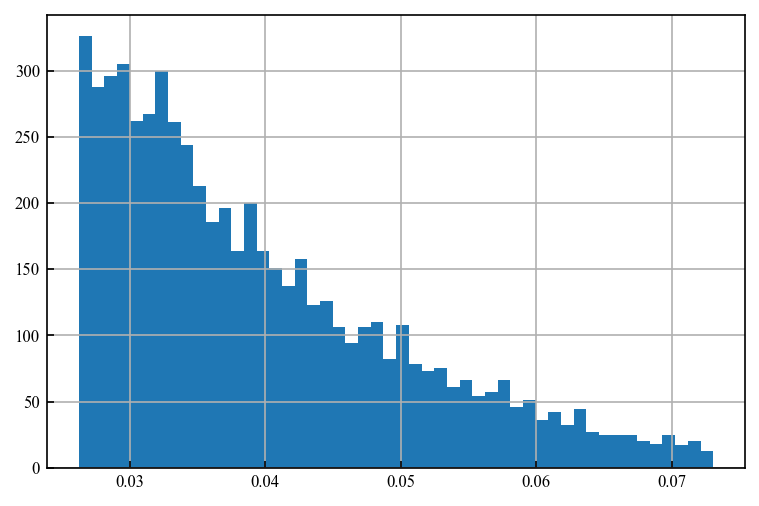

In [122]:
prior_gpq_hpxmap.hist(range=(prior_gpq_hpxmap.quantile(q=0.75),prior_gpq_hpxmap.quantile(q=0.99)),bins=50)

In [124]:
# 99%分位区间以上的prior替换为median
combined_hpxmap_b5.loc[combined_hpxmap_b5.prior_gpq>combined_hpxmap_b5.prior_gpq.quantile(q=0.99)] = combined_hpxmap_b5.prior_gpq.median()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [125]:
combined_hpxmap_b5.prior_gpq.describe()

count    24869.000000
mean         0.017096
std          0.015136
min          0.000283
25%          0.005048
50%          0.012974
75%          0.025566
max          0.073018
Name: prior_gpq, dtype: float64

In [126]:
combined_hpxmap_b5.rename(columns={'prior_gpq':'P_prior'},inplace=True)
combined_hpxmap_b5

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


iring     inest  D_all  D_goodph      D_old  D_goodqso  D_new_  \
358912  358912.0  312064.0    NaN       NaN  57.190949        NaN     NaN   
358913  358913.0  311723.0    NaN       NaN        NaN        NaN     NaN   
358914  358914.0  311724.0    NaN       NaN        NaN        NaN     NaN   
358915  358915.0  311719.0    NaN       NaN  19.063650        NaN     NaN   
358916  358916.0  311728.0    NaN       NaN        NaN        NaN     NaN   
...          ...       ...    ...       ...        ...        ...     ...   
427515  427515.0  278116.0    NaN       NaN        NaN        NaN     NaN   
427516  427516.0  278095.0    NaN       NaN        NaN        NaN     NaN   
427517  427517.0  278104.0    NaN       NaN        NaN        NaN     NaN   
427518  427518.0  278099.0    NaN       NaN        NaN        NaN     NaN   
427519  427519.0  278100.0    NaN       NaN        NaN        NaN     NaN   

        D_new_low  P_prior           l         b  
358912        NaN      NaN    0.000000  4.929937  
358913        NaN      NaN    0.351562  4.929937  
358914        NaN      NaN    0.703125  4.929937  
358915        NaN      NaN    1.054688  4.929937  
358916        NaN      NaN    1.406250  4.929937  
...           ...      ...         ...       ...  
427515        NaN      NaN  358.242188 -4.929937  
427516        NaN      NaN  358.593750 -4.929937  
427517        NaN      NaN  358.945312 -4.929937  
427518        NaN      NaN  359.296875 -4.929937  
427519        NaN      NaN  359.648438 -4.929937  

[68608 rows x 11 columns]

In [141]:
combined_hpxmap.rename(columns={'prior_gpq':'P_prior'},inplace=True)
combined_hpxmap.iloc[combined_hpxmap_b5.index] = combined_hpxmap_b5
combined_hpxmap

iring     inest  D_all  D_goodph  D_old  D_goodqso  D_new_  \
0            0.0   65535.0    NaN       NaN    NaN  38.127299     NaN   
1            1.0  131071.0    NaN       NaN    NaN  38.127299     NaN   
2            2.0  196607.0    NaN       NaN    NaN  19.063650     NaN   
3            3.0  262143.0    NaN       NaN    NaN  38.127299     NaN   
4            4.0   65534.0    NaN       NaN    NaN  95.318248     NaN   
...          ...       ...    ...       ...    ...        ...     ...   
786427  786427.0  720897.0    NaN       NaN    NaN        NaN     NaN   
786428  786428.0  524288.0    NaN       NaN    NaN        NaN     NaN   
786429  786429.0  589824.0    NaN       NaN    NaN        NaN     NaN   
786430  786430.0  655360.0    NaN       NaN    NaN        NaN     NaN   
786431  786431.0  720896.0    NaN       NaN    NaN        NaN     NaN   

        D_new_low  P_prior      l          b  
0             NaN      NaN   45.0  89.817258  
1             NaN      NaN  135.0  89.817258  
2             NaN      NaN  225.0  89.817258  
3             NaN      NaN  315.0  89.817258  
4             NaN      NaN   22.5  89.634517  
...           ...      ...    ...        ...  
786427        NaN      NaN  337.5 -89.634517  
786428        NaN      NaN   45.0 -89.817258  
786429        NaN      NaN  135.0 -89.817258  
786430        NaN      NaN  225.0 -89.817258  
786431        NaN      NaN  315.0 -89.817258  

[786432 rows x 11 columns]

In [145]:
# 对应healpixmap上每个pixel的数密度

D_all_hpxmap = combined_hpxmap.D_all 
D_goodph_hpxmap = combined_hpxmap.D_goodph
D_old_hpxmap = combined_hpxmap.D_old
D_goodqso_hpxmap = combined_hpxmap.D_goodqso

D_new__hpxmap = combined_hpxmap.D_new_ 
D_new_low_hpxmap= combined_hpxmap.D_new_low
prior_gpq_hpxmap = combined_hpxmap.P_prior

In [146]:
combined_hpxmap.to_csv('/cargo/public/catdata/gpq_nir/density_map/combined_hpxmap.csv', index=False)

In [147]:
np.save('/cargo/public/catdata/gpq_nir/density_map/D_all_hpxmap.npy',D_all_hpxmap)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_goodph_hpxmap.npy',D_goodph_hpxmap)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_old_hpxmap.npy',D_old_hpxmap)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_new__hpxmap.npy',D_new__hpxmap)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_new_low_hpxmap.npy',D_new_low_hpxmap)
np.save('/cargo/public/catdata/gpq_nir/density_map/P_prior_hpxmap.npy',prior_gpq_hpxmap)

### 5.2 plot b5 sky density map

In [149]:
import healpy as hp

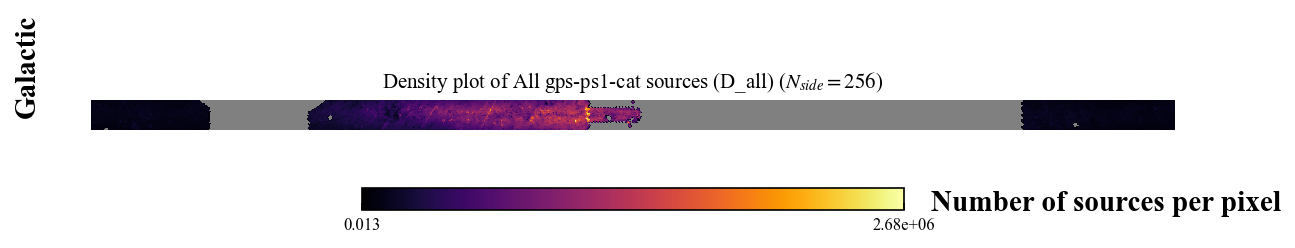

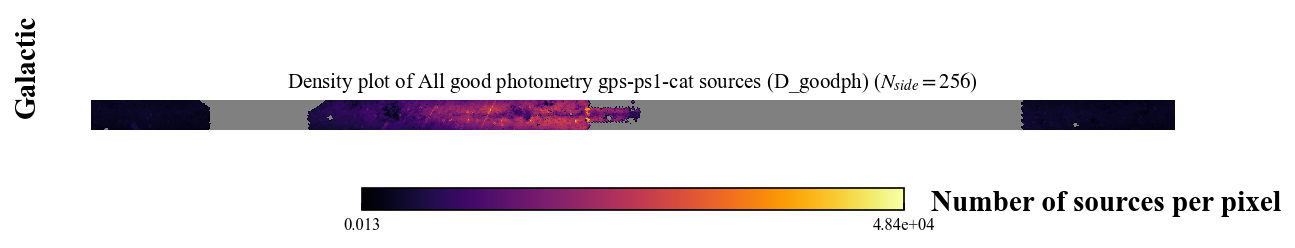

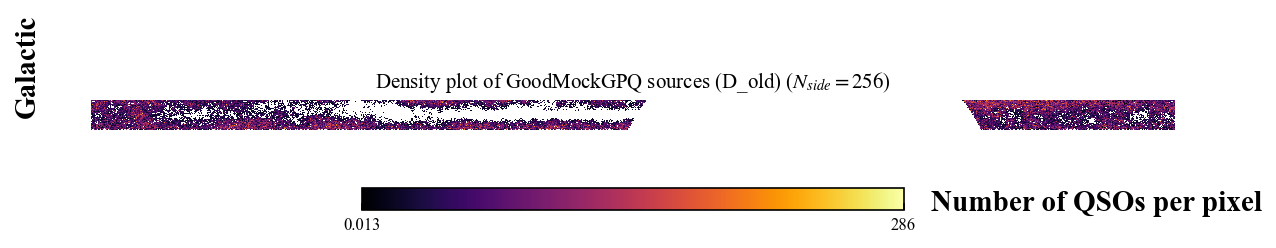

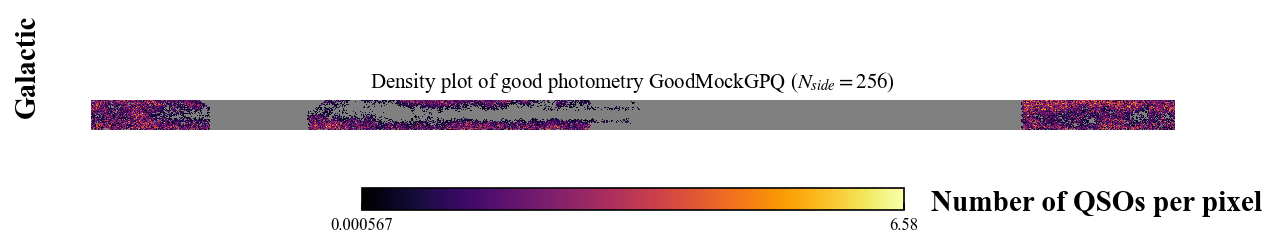

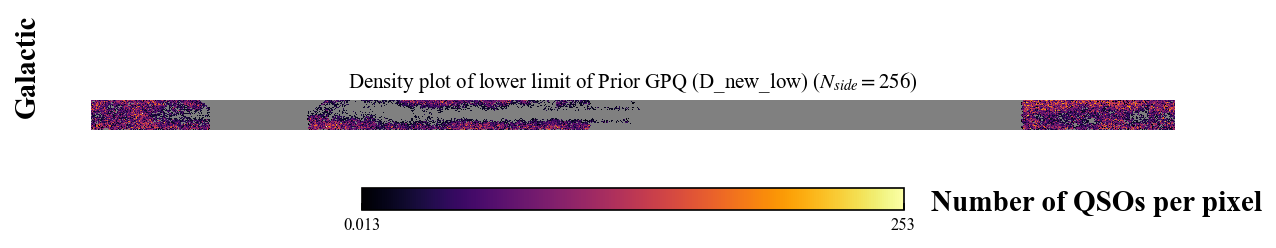

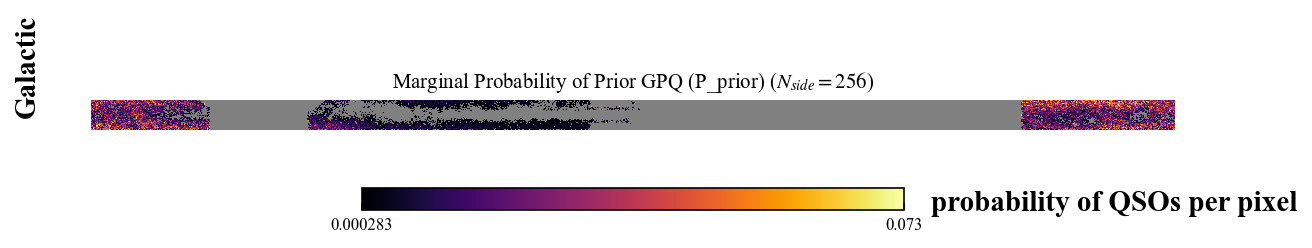

In [150]:
cartb_all = hp.cartview(combined_hpxmap.D_all.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
                    unit="Number of sources per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of All gps-ps1-cat sources (D_all) ($N_{side}=256$)")
map_dump_all = pd.DataFrame(cartb_all)
D_all = map_dump_all.values


cartb_goodph = hp.cartview(combined_hpxmap.D_goodph.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
                    unit="Number of sources per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of All good photometry gps-ps1-cat sources (D_goodph) ($N_{side}=256$)")
map_dump_goodph = pd.DataFrame(cartb_goodph)
D_goodph = map_dump_goodph.values

cartb_old = hp.cartview(combined_hpxmap.D_old.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of GoodMockGPQ sources (D_old) ($N_{side}=256$)")
map_dump_old = pd.DataFrame(cartb_old)
D_old = map_dump_old.values

cartb_new_ = hp.cartview(combined_hpxmap.D_new_.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of good photometry GoodMockGPQ ($N_{side}=256$)")
map_dump_new_ = pd.DataFrame(cartb_new_)
D_new_ = map_dump_new_.values

cartb_new_low = hp.cartview(combined_hpxmap.D_new_low.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of lower limit of Prior GPQ (D_new_low) ($N_{side}=256$)")
map_dump_new_low = pd.DataFrame(cartb_new_low)
D_new_low = map_dump_new_low.values



cartb_prior_gpq = hp.cartview(combined_hpxmap.P_prior.values,
                    coord=["G"],
                    latra = [-5,5],  
                    cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
                    unit="probability of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Marginal Probability of Prior GPQ (P_prior) ($N_{side}=256$)")
map_dump_prior_gpq = pd.DataFrame(cartb_prior_gpq)
prior_gpq = map_dump_prior_gpq.values

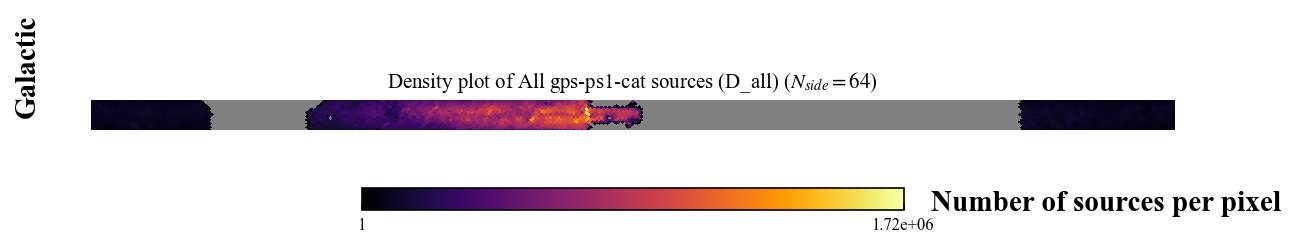

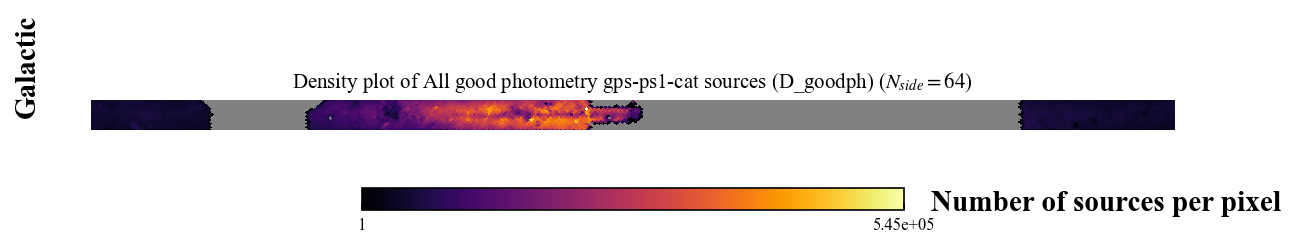

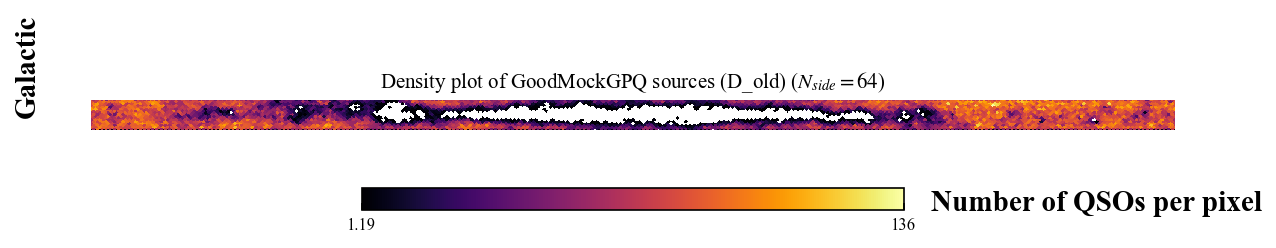

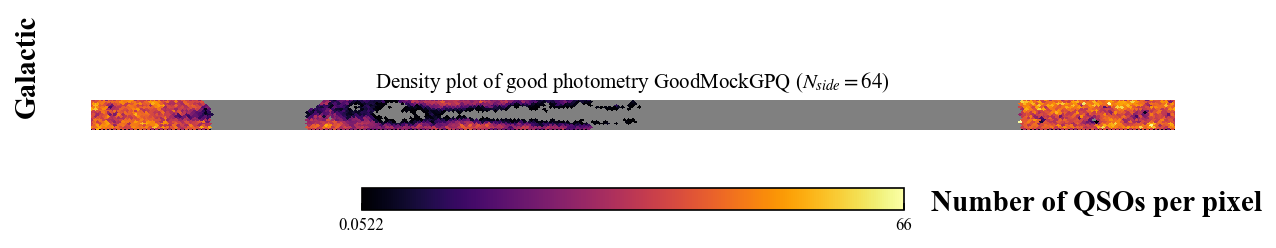

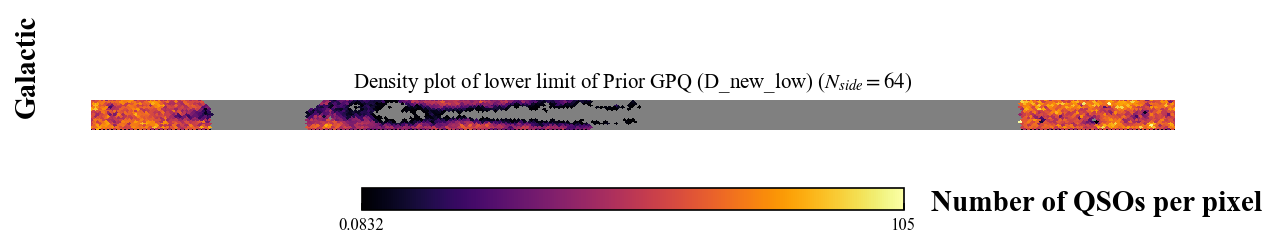

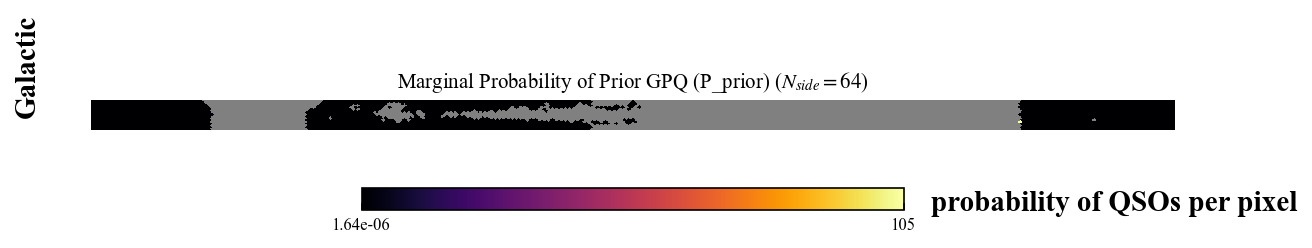

In [91]:
# 64 pixel的天区图

# cartb_all = hp.cartview(combined_hpxmap.D_all.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
# #                     badcolor='w',
# #                     bgcolor='w',
#                     unit="Number of sources per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of All gps-ps1-cat sources (D_all) ($N_{side}=64$)")
# map_dump_all = pd.DataFrame(cartb_all)
# D_all = map_dump_all.values


# cartb_goodph = hp.cartview(combined_hpxmap.D_goodph.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
# #                     badcolor='w',
# #                     bgcolor='w',
#                     unit="Number of sources per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of All good photometry gps-ps1-cat sources (D_goodph) ($N_{side}=64$)")
# map_dump_goodph = pd.DataFrame(cartb_goodph)
# D_goodph = map_dump_goodph.values

# cartb_old = hp.cartview(combined_hpxmap.D_old.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
#                     badcolor='w',
#                     bgcolor='w',
#                     unit="Number of QSOs per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of GoodMockGPQ sources (D_old) ($N_{side}=64$)")
# map_dump_old = pd.DataFrame(cartb_old)
# D_old = map_dump_old.values

# cartb_new_ = hp.cartview(combined_hpxmap.D_new_.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
# #                     badcolor='w',
# #                     bgcolor='w',
#                     unit="Number of QSOs per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of good photometry GoodMockGPQ ($N_{side}=64$)")
# map_dump_new_ = pd.DataFrame(cartb_new_)
# D_new_ = map_dump_new_.values

# cartb_new_low = hp.cartview(combined_hpxmap.D_new_low.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
# #                     badcolor='w',
# #                     bgcolor='w',
#                     unit="Number of QSOs per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Density plot of lower limit of Prior GPQ (D_new_low) ($N_{side}=64$)")
# map_dump_new_low = pd.DataFrame(cartb_new_low)
# D_new_low = map_dump_new_low.values



# cartb_prior_gpq = hp.cartview(combined_hpxmap.P_prior.values,
#                     coord=["G"],
#                     latra = [-5,5],  
#                     cmap='inferno',
# #                     badcolor='w',
# #                     bgcolor='w',
#                     unit="probability of QSOs per pixel",
#                     xsize=1800, 
#                     return_projected_map=True,
#                    title="Marginal Probability of Prior GPQ (P_prior) ($N_{side}=64$)")
# map_dump_prior_gpq = pd.DataFrame(cartb_prior_gpq)
# prior_gpq = map_dump_prior_gpq.values

In [151]:
np.save('/cargo/public/catdata/gpq_nir/density_map/D_all.npy',D_all)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_goodph.npy',D_goodph)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_old.npy',D_old)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_new_.npy',D_new_)
np.save('/cargo/public/catdata/gpq_nir/density_map/D_new_low.npy',D_new_low)
np.save('/cargo/public/catdata/gpq_nir/density_map/P_prior.npy',prior_gpq)

In [166]:
np.nanmedian(D_new_low),np.nanmax(D_new_low)

(56.757647742320145, 253.1652346146972)

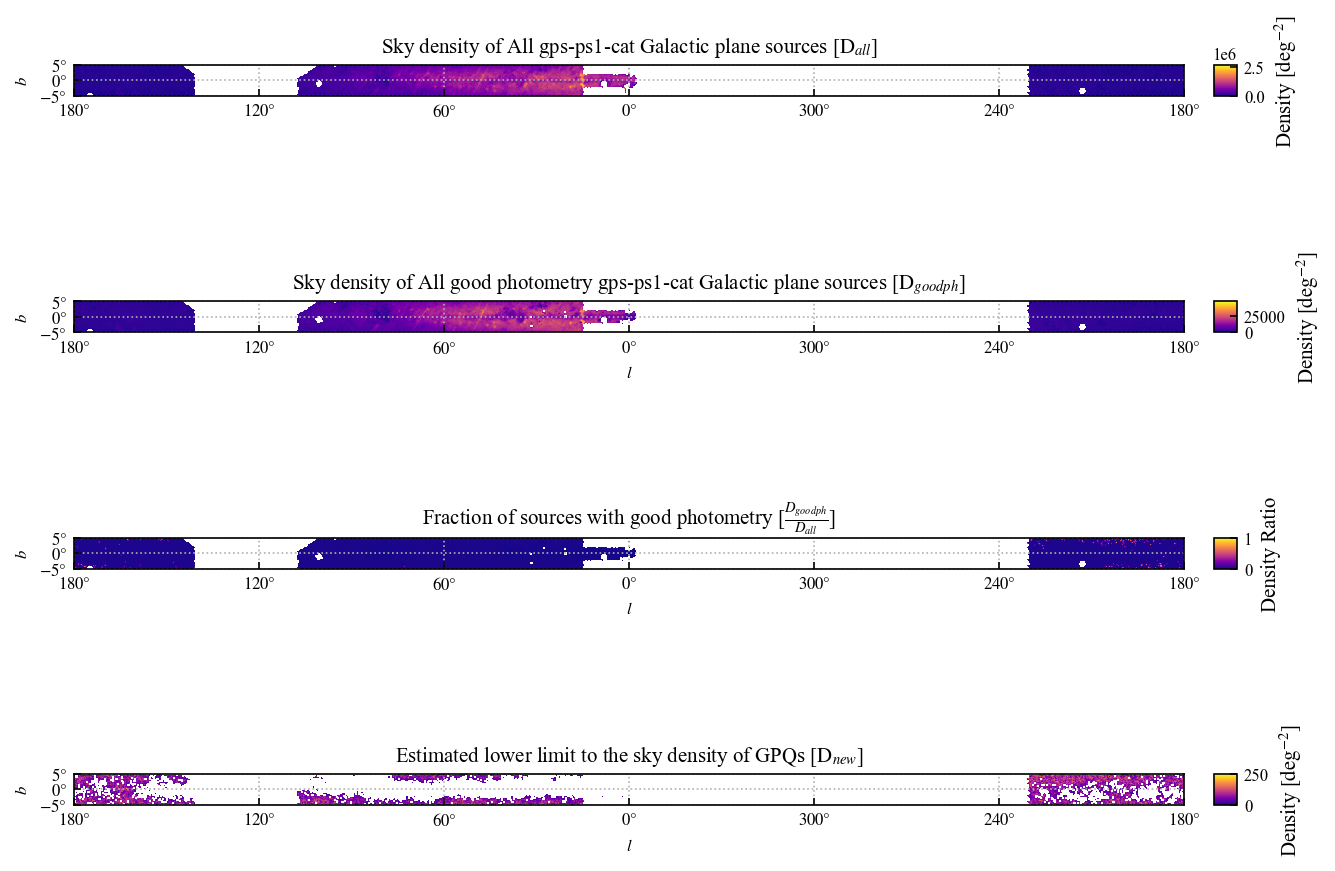

In [167]:
# plot on one figure

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm


fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(10,8))

divider1,divider2,divider3, divider4 = make_axes_locatable(ax1),\
                                make_axes_locatable(ax2),\
                                    make_axes_locatable(ax3),\
                                        make_axes_locatable(ax4)

cax1,cax2,cax3,cax4 = divider1.append_axes('right', size='2%', pad=0.2),\
                    divider2.append_axes('right', size='2%', pad=0.2),\
                        divider3.append_axes('right', size='2%', pad=0.2),\
                           divider4.append_axes('right', size='2%', pad=0.2)


im1 = ax1.imshow(D_all.data,
                origin='lower',
                cmap='plasma',
               norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_all))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                    r'$0\degree$',r'$300\degree$',r'$240\degree$',
                    r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im1, cax=cax1, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]'
                    )
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky density of All gps-ps1-cat Galactic plane sources [$\mathrm{D}_{all}$]')
           
    
im2 = ax2.imshow(D_goodph.data,
                origin='lower',
                cmap='plasma',
               norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_goodph))
               )
ax2.set_xticks(np.arange(0, 1801, 300))
ax2.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                     r'$0\degree$',r'$300\degree$',r'$240\degree$',
                     r'$180\degree$'))
ax2.set_xlabel(r"$l$")
ax2.set_yticks(np.arange(0, 51, 25))
ax2.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax2.set_ylabel(r"$b$")
ax2.grid(linestyle=':')
cbar2 = fig.colorbar(im2, 
                     cax=cax2, 
#                      shrink=0.5,
                     orientation='vertical',
                      label='Density [$\mathrm{deg}^{-2}$]'
                    )
cbar2.ax.yaxis.label.set_size(10)
ax2.title.set_text('Sky density of All good photometry gps-ps1-cat Galactic plane sources [$\mathrm{D}_{goodph}$]')


im3 = ax3.imshow((D_goodph/D_all).data,
                origin='lower',
                cmap='plasma',
               norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_goodph/D_all))
               )
ax3.set_xticks(np.arange(0, 1801, 300))
ax3.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                     r'$0\degree$',r'$300\degree$',r'$240\degree$',
                     r'$180\degree$'))
ax3.set_xlabel(r"$l$")
ax3.set_yticks(np.arange(0, 51, 25))
ax3.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax3.set_ylabel(r"$b$")
ax3.grid(linestyle=':')
cbar3 = fig.colorbar(im3, 
                     cax=cax3, 
#                      shrink=0.5,
                     orientation='vertical',
                      label='Density Ratio'
                    )
cbar3.ax.yaxis.label.set_size(10)
ax3.title.set_text(r'Fraction of sources with good photometry [$\frac{D_{goodph}}{D_{all}}$]')



im4 = ax4.imshow((D_new_low),
                origin='lower',
                cmap='plasma',
               norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_new_low))
               )
ax4.set_xticks(np.arange(0, 1801, 300))
ax4.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                     r'$0\degree$',r'$300\degree$',r'$240\degree$',
                     r'$180\degree$'))
ax4.set_xlabel(r"$l$")
ax4.set_yticks(np.arange(0, 51, 25))
ax4.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax4.set_ylabel(r"$b$")
ax4.grid(linestyle=':')
cbar4 = fig.colorbar(im4, 
                     cax=cax4, 
#                      shrink=0.5,
                     orientation='vertical',
                      label='Density [$\mathrm{deg}^{-2}$]'
                    )
cbar4.ax.yaxis.label.set_size(10)
ax4.title.set_text('Estimated lower limit to the sky density of GPQs [$\mathrm{D}_{new}$]')

plt.savefig('/cargo/public/catdata/gpq_nir/density_map/all_density_map')

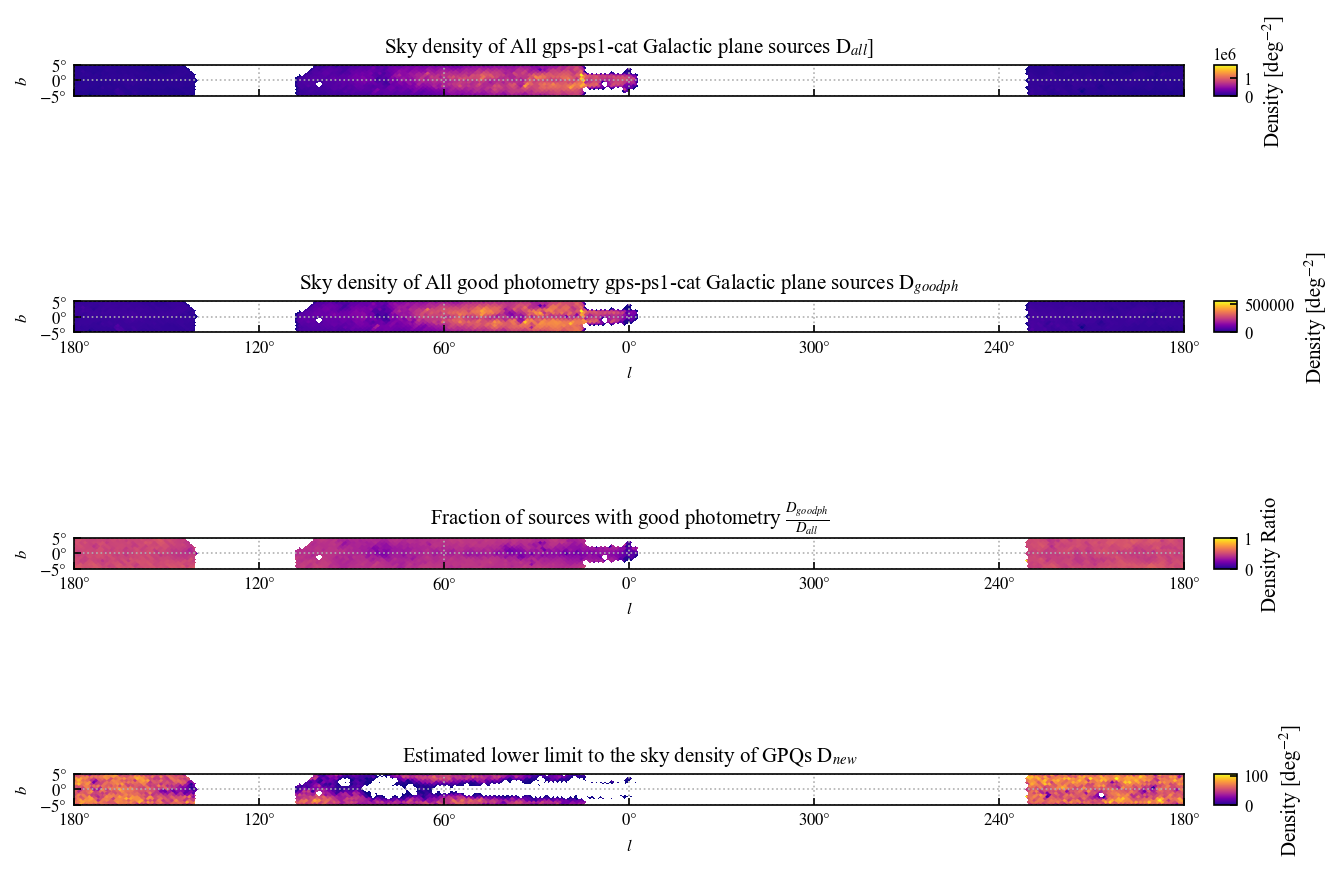

In [109]:
# # plot on one figure

# import matplotlib as mpl
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm


# fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(10,8))

# divider1,divider2,divider3, divider4 = make_axes_locatable(ax1),\
#                                 make_axes_locatable(ax2),\
#                                     make_axes_locatable(ax3),\
#                                         make_axes_locatable(ax4)

# cax1,cax2,cax3,cax4 = divider1.append_axes('right', size='2%', pad=0.2),\
#                     divider2.append_axes('right', size='2%', pad=0.2),\
#                         divider3.append_axes('right', size='2%', pad=0.2),\
#                            divider4.append_axes('right', size='2%', pad=0.2)


# im1 = ax1.imshow(D_all_hpxmap.data,
#                 origin='lower',
#                 cmap='plasma',
#                norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_all))
#                )
# ax1.set_xticks(np.arange(0, 1801, 300))
# ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                     r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                     r'$180\degree$'))
# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im1, cax=cax1, 
#                      orientation='vertical',
#                      label='Density [$\mathrm{deg}^{-2}$]'
#                     )
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('Sky density of All gps-ps1-cat Galactic plane sources $\mathrm{D}_{all}$]')
           
    
# im2 = ax2.imshow(D_goodph_hpxmap.data,
#                 origin='lower',
#                 cmap='plasma',
#                norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_goodph))
#                )
# ax2.set_xticks(np.arange(0, 1801, 300))
# ax2.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                      r'$180\degree$'))
# ax2.set_xlabel(r"$l$")
# ax2.set_yticks(np.arange(0, 51, 25))
# ax2.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax2.set_ylabel(r"$b$")
# ax2.grid(linestyle=':')
# cbar2 = fig.colorbar(im2, 
#                      cax=cax2, 
# #                      shrink=0.5,
#                      orientation='vertical',
#                       label='Density [$\mathrm{deg}^{-2}$]'
#                     )
# cbar2.ax.yaxis.label.set_size(10)
# ax2.title.set_text('Sky density of All good photometry gps-ps1-cat Galactic plane sources $\mathrm{D}_{goodph}$')


# im3 = ax3.imshow((D_goodph_hpxmap/D_all_hpxmap).data,
#                 origin='lower',
#                 cmap='plasma',
#                norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_goodph/D_all))
#                )
# ax3.set_xticks(np.arange(0, 1801, 300))
# ax3.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                      r'$180\degree$'))
# ax3.set_xlabel(r"$l$")
# ax3.set_yticks(np.arange(0, 51, 25))
# ax3.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax3.set_ylabel(r"$b$")
# ax3.grid(linestyle=':')
# cbar3 = fig.colorbar(im3, 
#                      cax=cax3, 
# #                      shrink=0.5,
#                      orientation='vertical',
#                       label='Density Ratio'
#                     )
# cbar3.ax.yaxis.label.set_size(10)
# ax3.title.set_text(r'Fraction of sources with good photometry $\frac{D_{goodph}}{D_{all}}$')



# im4 = ax4.imshow((D_new_low_hpxmap).data,
#                 origin='lower',
#                 cmap='plasma',
#                norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(D_new_low))
#                )
# ax4.set_xticks(np.arange(0, 1801, 300))
# ax4.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                      r'$180\degree$'))
# ax4.set_xlabel(r"$l$")
# ax4.set_yticks(np.arange(0, 51, 25))
# ax4.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax4.set_ylabel(r"$b$")
# ax4.grid(linestyle=':')
# cbar4 = fig.colorbar(im4, 
#                      cax=cax4, 
# #                      shrink=0.5,
#                      orientation='vertical',
#                       label='Density [$\mathrm{deg}^{-2}$]'
#                     )
# cbar4.ax.yaxis.label.set_size(10)
# ax4.title.set_text('Estimated lower limit to the sky density of GPQs $\mathrm{D}_{new}$')

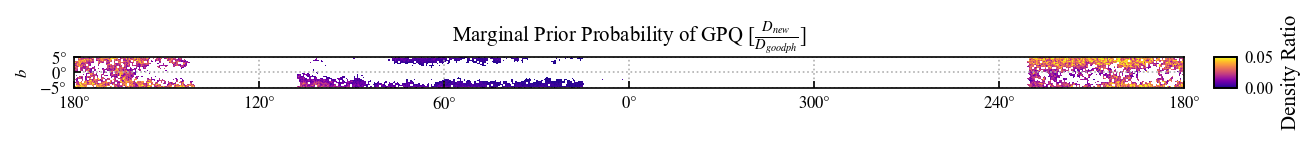

In [181]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(prior_gpq.data,
                origin='lower',
                cmap='plasma',
 #            norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(priordens))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density Ratio')
ax1.title.set_text(r'Marginal Prior Probability of GPQ [$\frac{D_{new}}{D_{goodph}}$]')


im.set_clim(0,0.05)
plt.colorbar(im, cax=cax,orientation='vertical',
                     label='Density Ratio')
cbar1.ax.yaxis.label.set_size(10)


plt.show()
fig.savefig('/cargo/public/catdata/figures/Prior.pdf',dpi=300)

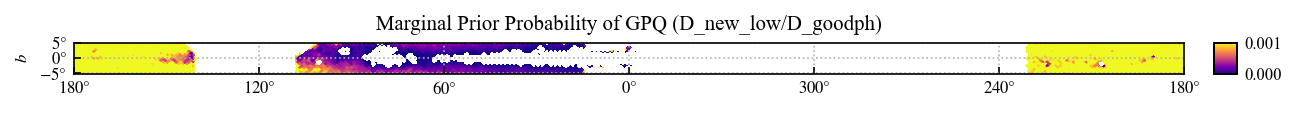

In [98]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm
# fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='2%', pad=0.2)
# im = ax1.imshow(prior_gpq.data,
#                 origin='lower',
#                 cmap='plasma',
#  #            norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(priordens))
#                )
# ax1.set_xticks(np.arange(0, 1801, 300))
# ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                       r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                       r'$180\degree$'))
# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im, cax=cax, 
#                      orientation='vertical',
#                      label='Density Ratio')
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('Marginal Prior Probability of GPQ (D_new_low/D_goodph)')


# # im.set_clim(0,0.001)
# # plt.colorbar(im, cax=cax)
# # plt.show()

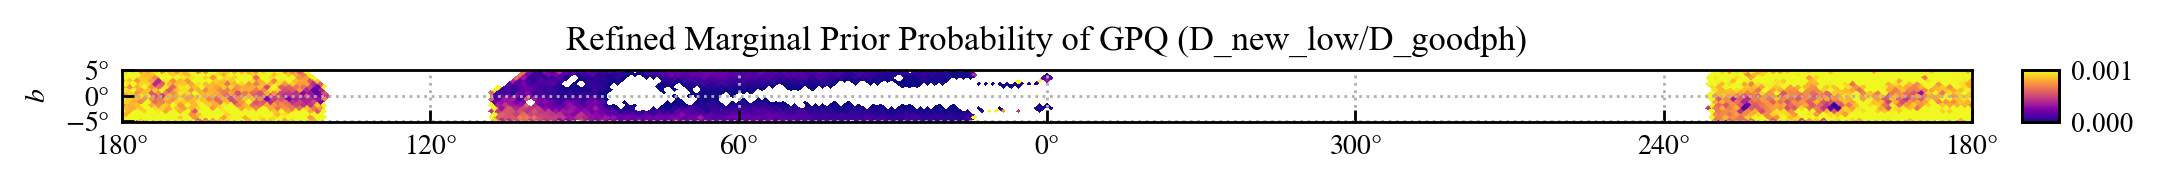

In [398]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.colors import LogNorm
# fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='2%', pad=0.2)
# im = ax1.imshow(priordens_gpq_refined.data,
#                 origin='lower',
#                 cmap='plasma',
#  #            norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(priordens))
#                )
# ax1.set_xticks(np.arange(0, 1801, 300))
# ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
#                       r'$0\degree$',r'$300\degree$',r'$240\degree$',
#                       r'$180\degree$'))
# ax1.set_yticks(np.arange(0, 51, 25))
# ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
# ax1.set_ylabel(r"$b$")
# ax1.grid(linestyle=':')
# cbar1 = fig.colorbar(im, cax=cax, 
#                      orientation='vertical',
#                      label='Density Ratio')
# cbar1.ax.yaxis.label.set_size(10)
# ax1.title.set_text('Refined Marginal Prior Probability of GPQ (D_new_low/D_goodph)')


# im.set_clim(0,0.001)
# plt.colorbar(im, cax=cax)
# plt.show()

### 5.3 other useful plots

以下是不对的👇  
  
D_all = cmall_b5  
D_goodph = cmallgood_b5  
D_old = cmgpq_b5_b
D_goodqso = cmgoodqso

D_new_ = D_old * D_goodph/D_all  
D_new_low= D_new_ * np.nanmedian(D_goodqso)/np.nanmedian(D_new_)

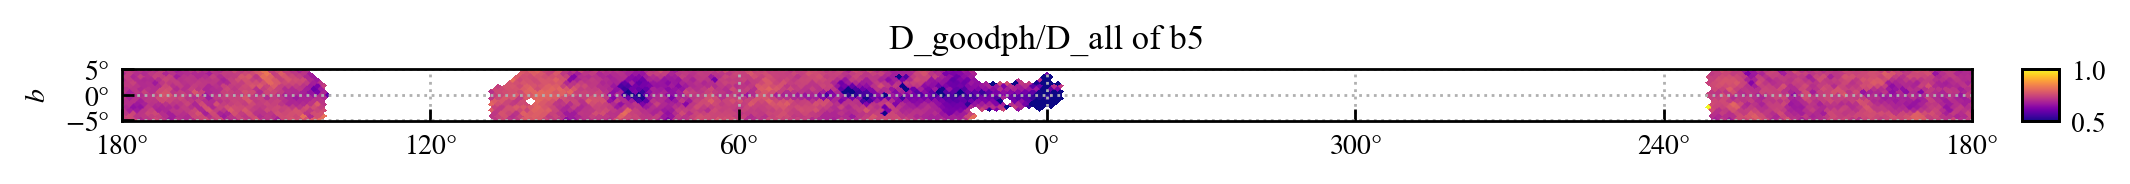

In [342]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(D_goodph/D_all.data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('D_goodph/D_all of b5')

im.set_clim(0.5,1)
plt.colorbar(im, cax=cax)
plt.show()

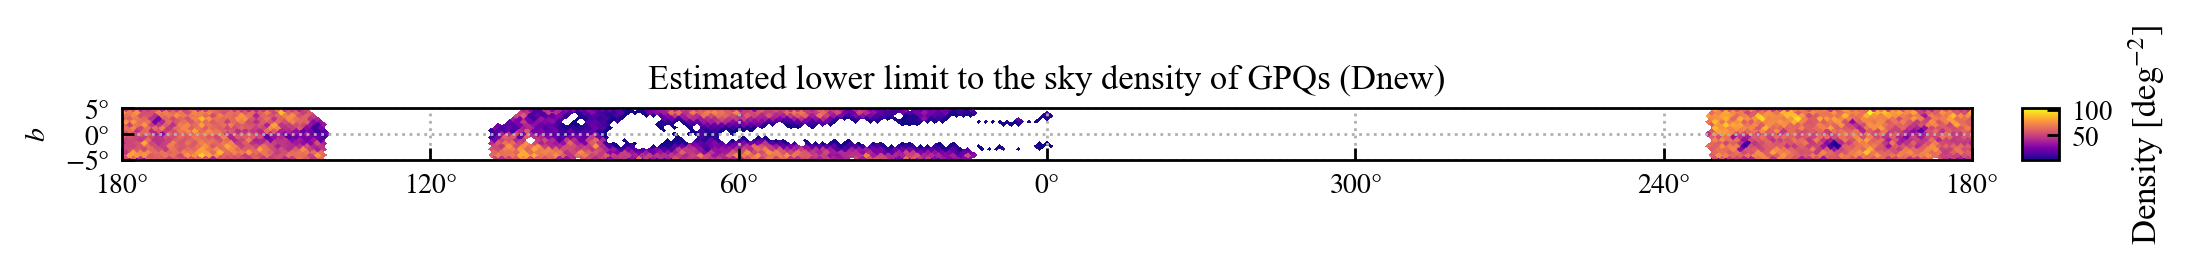

In [343]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(D_new_low.data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Estimated lower limit to the sky density of GPQs (Dnew)')

# im.set_clim(0.5,1)
# plt.colorbar(im, cax=cax)
# plt.show()

In [346]:
print('Median(Dgoodqso)',np.nanmedian(D_goodqso))
print('Median(D_new_)',np.nanmedian(D_new_))
print('Median(D_new_low)',np.nanmedian(D_new_low))
print('Max(D_new_loew)',np.nanmax(D_new_low))

Median(Dgoodqso) 50.042080313181415
Median(D_new_) 47.59640878656689
Median(D_new_low) 50.778538790205495
Max(D_new_loew) 102.80286870830336


In [347]:
print('Median(D_goodph/D_all)',np.nanmedian(D_goodph/D_all))
print('Median(D_old)',np.nanmedian(D_old))

Median(D_goodph/D_all) 0.7228532947066149
Median(D_old) 59.573905134739775


### i) D_new_low/D_goodph

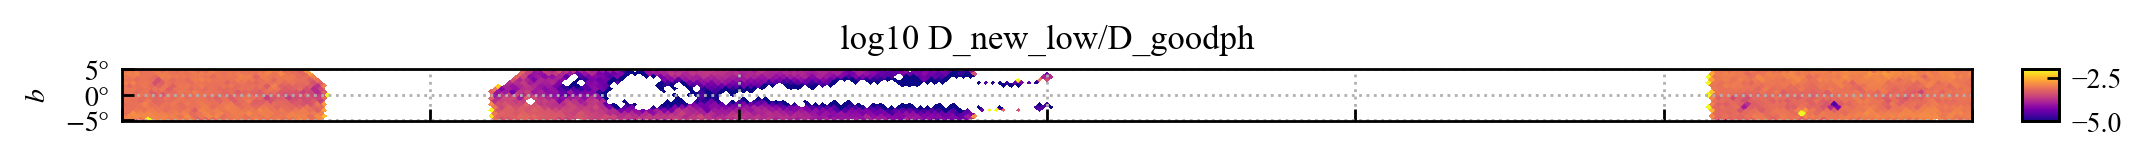

In [348]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(np.log10(D_new_low/D_goodph).data,
                origin='lower',
                cmap='plasma',
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('log10 D_new_low/D_goodph')

im.set_clim(-5,-2)
plt.colorbar(im, cax=cax)
plt.show()

In [349]:
print('Min Prior Probability of GPQ :',np.nanmin(D_new_low/D_goodph))
print('Median Prior Probability of GPQ:',np.nanmedian(D_new_low/D_goodph))
print('Max Prior Probability of GPQ:',np.nanmax(D_new_low/D_goodph))

Min Prior Probability of GPQ : 1.2090732376203532e-06
Median Prior Probability of GPQ: 0.0005998038352564543
Max Prior Probability of GPQ: 66.09908115099344


### ii) D_goodmockgpq/D_all

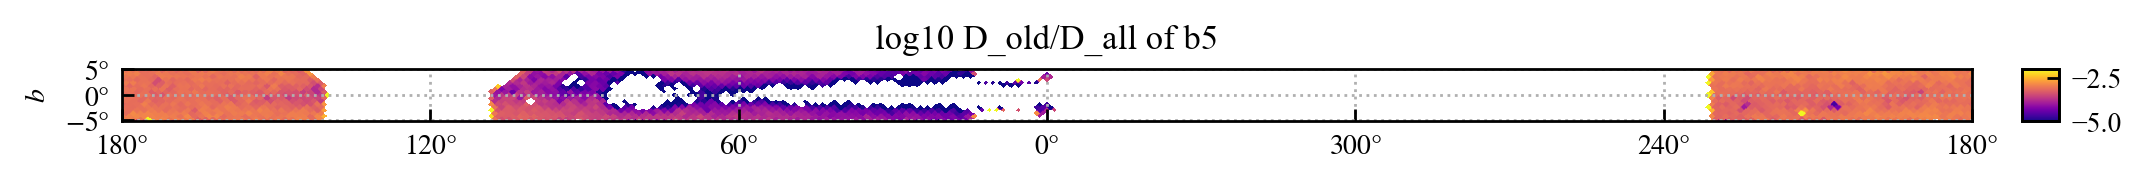

In [350]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(np.log10(D_old/D_all).data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('log10 D_old/D_all of b5')

im.set_clim(-5,-2)
plt.colorbar(im, cax=cax)
plt.show()

In [351]:
print('Min D_old/D_all:',np.nanmin(D_old/D_all))
print('Median D_old/D_all:',np.nanmedian(D_old/D_all))
print('Max D_old/D_all:',np.nanmax(D_old/D_all))

Min D_old/D_all: 1.1333044518755707e-06
Median D_old/D_all: 0.000558549648623384
Max D_old/D_all: 61.956861340129365


### plot on one figure

### deal with outlier - set threshold
因为Max Prior Probability of GPQ: 54.67194359041322 >> 1  
避免最后预测产生的类星体概率，需要将D_new_low/D_goodph比较大的值设为median  

In [354]:
np.where(D_new_low/D_goodph==np.nanmax(D_new_low/D_goodph))

(array([11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 15, 15]),
 array([1542, 1543, 1540, 1541, 1542, 1543, 1544, 1545, 1540, 1541, 1542,
        1543, 1544, 1545, 1541, 1542, 1543, 1544, 1542, 1543]))

In [355]:
np.where(D_goodph/D_all==np.nanmax(D_goodph/D_all))

(array([11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 15, 15]),
 array([1542, 1543, 1540, 1541, 1542, 1543, 1544, 1545, 1540, 1541, 1542,
        1543, 1544, 1545, 1541, 1542, 1543, 1544, 1542, 1543]))

In [356]:
np.where(D_all==np.nanmin(D_all))

(array([11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 15, 15]),
 array([1542, 1543, 1540, 1541, 1542, 1543, 1544, 1545, 1540, 1541, 1542,
        1543, 1544, 1545, 1541, 1542, 1543, 1544, 1542, 1543]))

In [357]:
# set threshold (set where D_new_low/D_goodph>=1 as median)

np.where(D_new_low/D_goodph>=1)

(array([ 8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
        11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14,
        14, 14, 14, 15, 15, 22, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25,
        25, 25, 25, 25, 26, 26, 26, 27]),
 array([ 358,  359,  356,  357,  358,  359,  360,  356,  357,  358,  359,
         360,  361,  357,  358,  359,  360, 1542, 1543,  358,  359, 1540,
        1541, 1542, 1543, 1544, 1545, 1540, 1541, 1542, 1543, 1544, 1545,
        1541, 1542, 1543, 1544, 1542, 1543,  200,  199,  200,  201,  198,
         199,  200,  201,  202,  203,  198,  199,  200,  201,  202,  203,
         199,  200,  201,  200]))